<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo final de Master</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


<b>"Análisis Geográfico Del Proceso De Gentrificación De Los Barrios De Madrid Y Su Predicción En Un Corto Plazo"</b>

 Author: Oscar Javier Abril Tique
 Date: Mayo-2022

In [1]:
# Utilitarias
# ==============================================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

import numpy as np

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing, cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

# Clustering jerárquico y dendrograma.
# ==============================================================================
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from kneed import DataGenerator, KneeLocator
from sklearn.metrics import silhouette_score

# Visualizacion.
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

#Control de advertencias 
#===============================================================================
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


# Cargue de Datos Inicial 

Para el cargue de datos incial se utiliza luego del resultado de las intersecciones goegraficas realizadas bajo la herramienta arcGIS ArcMap realizadas anteriormente y cuyo resultado se encuentra en la carpeta GeoProcesosArcGIs con el fichero Indicadores_Madrid.mpk y posteriormente, se realiza el cargue de los datos obtenidos.





## Cargue de Capa Barrios 

Se carga dataset descargado en formato shapefile <a href="https://datos.gob.es/es/catalogo/l01280796-barrios-municipales-de-madrid" target="_blank">link barrios.datos.madrid.es </a>


In [2]:
# se carga la capa Barrios y se almacena en un dataframe
os.chdir("/Users/Administrador/Documents/UOC/MasterCienciaDatos/4 Sem/TFM/Ficheros_limpieza/")
shapefilebarrios = gpd.read_file("Barrios_20210712.shp")
# se convierte el shapefile en dataframe
df_barr = pd.DataFrame(data=shapefilebarrios)

Se realiza una consulta inicial de los datos para confirmar que esten bien estructurados 

In [3]:

df_barr.head()

,NOMDIS,BARRIO,COD_DIS,COD_DIS_TX,BARRIO_MAY,COD_DISBAR,COD_BAR,NUM_BAR,BARRIO_MT,COD_DISB,AREA_M2,geometry
0,Villaverde,San Cristóbal,17,17,SAN CRISTOBAL,172,172,2,SAN CRISTOBAL,17-2,1.082492e+06,"POLYGON ((441930.867 4466853.189, 441929.463 4..."
1,Villaverde,Butarque,17,17,BUTARQUE,173,173,3,BUTARQUE,17-3,6.375522e+06,"POLYGON ((444144.857 4464473.211, 443940.236 4..."
2,Villaverde,Los Ángeles,17,17,LOS ANGELES,175,175,5,LOS ÁNGELES,17-5,1.935271e+06,"POLYGON ((441147.728 4466374.483, 441111.738 4..."
3,Villaverde,Los Rosales,17,17,LOS ROSALES,174,174,4,LOS ROSALES,17-4,1.540747e+06,"POLYGON ((442098.826 4468081.978, 442132.060 4..."
4,Villaverde,"Villaverde Alto, Casco Histórico de Villaverde",17,17,"VILLAVERDE ALTO, CASCO HISTORICO DE VILLAVERDE",171,171,1,"VILLAVERDE ALTO, CASCO HISTÓRICO DE VILLAVERDE",17-1,9.253554e+06,"POLYGON ((440129.276 4468362.078, 440048.482 4..."


El dataframe barrios contiene 131 registros y 12 variables 

In [4]:
df_barr.shape

(131, 12)


## Cargue de Factor Turismo

El factor turismo posee cinco diferentes fuentes de información, y todas fueron preprocesadas utilizando la aplicación ArcGIS ArcMap para el manejo de la información geográfica.




### Atracciones Culturales

El componenente atracciones culturales se encuentra subidividido en multiples ficheros como lo son:

CATALOGO_BIENES_INTERES_CULTURAL.shp
CERCA_Y_ARRABAL_FELIPE_II.shp
Limite_Pasiaje_Cultural.shp
Monumentos_Edificios_Singulares_Pasiaje_Cultural.shp
Zona_Amortiguamiento_Pasiaje_Cultural.shp


Se carga dataset descargado originalmente "El sitio el Paseo del Prado y el Buen Retiro, paisaje de las Artes y las Ciencias forma parte de la lista de Patrimonio Mundial" todos comprimidos eu un solo fichero y en formato shapefile <a href="https://geoportal.madrid.es/IDEAM_WBGEOPORTAL/dataset.iam?id=996b10b0-8a75-11ec-a85b-60634c31c0aa" target="_blank">link Bienes de Interes Cultural </a>


### Catalogo de bienes de interes Cultural

El tratamiento geográfico y de valores nulos se realizó en el fichero  Indicadores_Madrid.mpk

In [5]:
# se carga la capa Catalogo de bienes de interes Cultural y se almacena en un dataframe
df_BCul=pd.read_excel("BienesInteresCultural.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que esten bien estructurados 

In [6]:
df_BCul.head()

,Barrio,BieIntCul
0,Abrantes,1
1,Acacias,6
2,Adelfas,1
3,Aeropuerto,1
4,Águilas,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de BienesInteresCultural

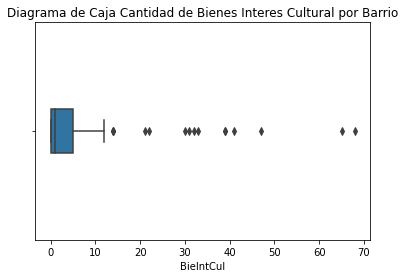

In [7]:
sns.boxplot(x=df_BCul.BieIntCul, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Bienes Interes Cultural por Barrio');

### CERCA_Y_ARRABAL_FELIPE_II

El tratamiento geográfico se realizó en el fichero  Indicadores_Madrid.mpk

In [8]:
# se carga la capa CERCA_Y_ARRABAL_FELIPE_II y se almacena en un dataframe
df_CyArr=pd.read_excel("CERCA_Y_ARRABAL_FELIPE_II.xls",sheet_name='Hoja1')

Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados 

In [9]:
df_CyArr.head()

,Barrio,CerArrFelII
0,Abrantes,0
1,Acacias,0
2,Adelfas,0
3,Aeropuerto,0
4,Águilas,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de CERCA_Y_ARRABAL_FELIPE_II

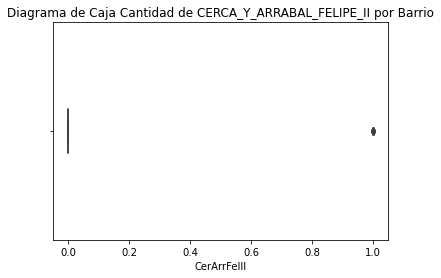

In [10]:
sns.boxplot(x=df_CyArr.CerArrFelII, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de CERCA_Y_ARRABAL_FELIPE_II por Barrio');

### Limite_Pasiaje_Cultural

El tratamiento geográfico y de valores nulos se realizó en el fichero  Indicadores_Madrid.mpk

In [11]:
# se carga la capa Limite_Pasiaje_Cultural y se almacena en un dataframe
df_LPCul=pd.read_excel("Limite_Pasiaje_Cultural.xls",sheet_name='Hoja1')

Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados


In [12]:
df_LPCul.head()

,Barrio,LimPCul
0,Abrantes,0
1,Acacias,0
2,Adelfas,0
3,Aeropuerto,0
4,Águilas,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Límite Pasiaje Cultural

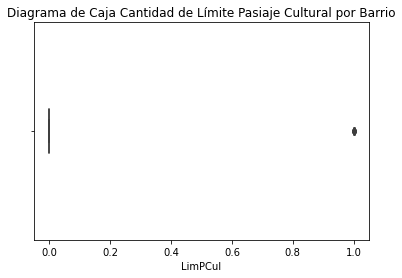

In [13]:
sns.boxplot(x=df_LPCul.LimPCul, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Límite Pasiaje Cultural por Barrio');


### Monumentos_Edificios_Singulares_Pasiaje_Cultural

El tratamiento geográfico y de valores nulos se realizó en el fichero  Indicadores_Madrid.mpk

In [14]:
# se carga la capa Monumentos_Edificios_Singulares_Pasiaje_Cultural y se almacena en un dataframe
df_MEdPasC=pd.read_excel("Monumentos_Edificios_Singulares_Pasiaje_Cultural.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [15]:
df_MEdPasC.head()

,Barrio,MonEduSin
0,Abrantes,0
1,Acacias,0
2,Adelfas,0
3,Aeropuerto,0
4,Águilas,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Monumentos_Edificios_Singulares_Pasiaje_Cultural

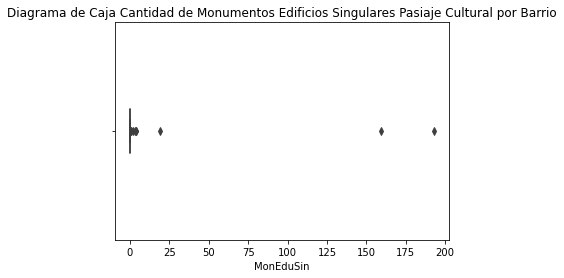

In [16]:
sns.boxplot(x=df_MEdPasC.MonEduSin, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Monumentos Edificios Singulares Pasiaje Cultural por Barrio');

### Zona_Amortiguamiento_Pasiaje_Cultural

El tratamiento geográfico y de valores nulos se realizó en el fichero  Indicadores_Madrid.mpk

In [17]:
# se carga la capa Zona_Amortiguamiento_Pasiaje_Cultural y se almacena en un dataframe
df_ZAPCul=pd.read_excel("Zona_Amortiguamiento_Pasiaje_Cultural.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [18]:
df_ZAPCul.head()

,Barrio,ZonAmrPaiCu
0,Abrantes,0
1,Acacias,1
2,Adelfas,1
3,Aeropuerto,0
4,Águilas,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Monumentos_Edificios_Singulares_Pasiaje_Cultural

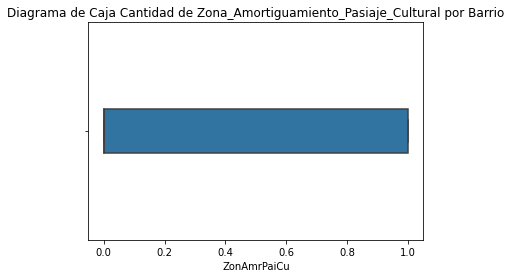

In [19]:
sns.boxplot(x=df_ZAPCul.ZonAmrPaiCu, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Zona_Amortiguamiento_Pasiaje_Cultural por Barrio');

### alojamientos_v1_es

El tratamiento geográfico y de valores nulos se realizó en el fichero  Indicadores_Madrid.mpk

In [20]:
# se carga la capa alojamientos_v1_es y se almacena en un dataframe
df_Alo=pd.read_excel("alojamientos_v1_es.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [21]:
df_Alo.head()

,Barrio,Alojamientos
0,Abrantes,0
1,Acacias,1
2,Adelfas,2
3,Aeropuerto,2
4,Águilas,0


## Cargue de Factor Normativo

El factor normativo posee una fuentes de información y fue preprocesada utilizando la aplicación ArcGIS ArcMap para el manejo de la información geográfica y el tratamiento de valores faltantes.

### Ordenamiento Territorial

El componenente Ordenamiento Territorial se encuentra subidividido en  un fichero como lo es:

V_USOS_DE_SUELO.shp

Se carga dataset descargado originalmente <i>"Urbanismo. Destino urbanístico del suelo"</i> todos comprimidos eu un solo fichero y en formato shapefile <a href="https://geoportal.madrid.es/IDEAM_WBGEOPORTAL/dataset.iam?id=2c84d9d2-856f-11eb-a265-c8e265b80eb6" target="_blank">link Ordenamiento Territorial </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk


In [22]:
# se carga la capa Ordenamiento Territorial y se almacena en un dataframe
df_OrdTer=pd.read_excel("Ordenamiento Territorial.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [23]:
df_OrdTer.head()

,Barrio,Porcm2disUsoRes
0,Abrantes,0.280951
1,Acacias,0.375610
2,Adelfas,0.356152
3,Aeropuerto,0.000445
4,Alameda de Osuna,0.359029


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Ordenamiento Territorial

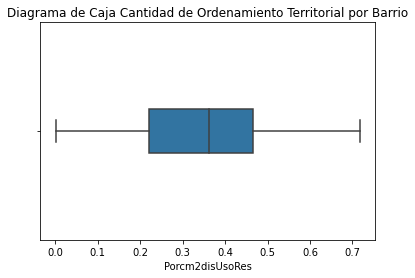

In [24]:
sns.boxplot(x=df_OrdTer.Porcm2disUsoRes, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Ordenamiento Territorial por Barrio');

## Cargue de Factor Demográfico

El factor Demografico posee una fuente de información y fue preprocesada utilizando la aplicación ArcGIS ArcMap para el manejo de la información geográfica y el tratamiento de valores faltantes.

### Natalidad

El componenente Natalidad se encuentra subidividido en un fichero como lo es:

panel_indicadores_distritos_barrios.csv

Se carga dataset descargado originalmente <i>"Panel de indicadores de distritos y barrios de Madrid. Estudio sociodemográfico"</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Panel de indicadores de distritos y barrios de Madrid </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk


In [25]:
# se carga la capa Natalidad y se almacena en un dataframe
df_Nat=pd.read_excel("Natalidad.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [26]:
df_Nat.head()

,Barrio,Natalidad
0,Abrantes,7.98
1,Acacias,7.03
2,Adelfas,8.05
3,Aeropuerto,4.27
4,Alameda de Osuna,6.46


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Ordenamiento Territorial

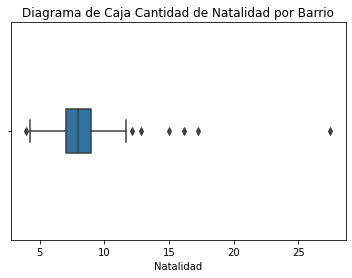

In [27]:
sns.boxplot(x=df_Nat.Natalidad, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Natalidad por Barrio');

### Población

El componenente población y Personas integrantes del hofar se encuentra subidividido en un fichero como lo es:

panel_indicadores_distritos_barrios.csv

Se carga dataset descargado originalmente <i>"Panel de indicadores de distritos y barrios de Madrid. Estudio sociodemográfico"</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Panel de indicadores de distritos y barrios de Madrid </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk


In [28]:
# se carga la capa Población y se almacena en un dataframe
df_Pob=pd.read_excel("Poblacion.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados


In [29]:
df_Pob.head()

,Barrio,Poblacion2020,Poblacion2019,Poblacion2018,Poblacion2017,PromIntHog_2020,PromIntHog_2019,PromIntHog_2018,PromIntHog_2017
0,Abrantes,31664,30739,29769,29373.0,2.86,2.79,2.729598,2.717206
1,Adelfas,18719,18474,18345,18149.0,2.37,2.38,2.390153,2.395153
2,Aeropuerto,1924,1851,1794,1784.0,2.42,2.43,2.421143,2.431538
3,Alameda de Osuna,19751,19526,19446,19386.0,2.70,2.69,2.657778,2.646884
4,Almagro,19655,19807,19799,19698.0,2.69,2.69,2.712134,2.729269


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de población

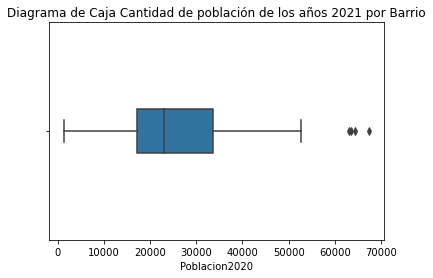

In [30]:
sns.boxplot(x=df_Pob.Poblacion2020, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de población de los años 2021 por Barrio');

### Nivel Educativo

El componenente Nivel Educativo se encuentra subidividido en un fichero como lo es:

panel_indicadores_distritos_barrios.csv

Se carga dataset descargado originalmente <i>"Panel de indicadores de distritos y barrios de Madrid. Estudio sociodemográfico"</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Panel de indicadores de distritos y barrios de Madrid </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk


In [31]:
# se carga la capa educación se almacena en un dataframe
df_Edu=pd.read_excel("Educacion.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados


In [32]:
df_Edu.head()

,Barrio,Estudiossuperiores2017,Estudiossuperiores2018,BachillerElemental2019,Estudiossuperiores2019,Noleerniescribir2019,BachillerElemental2020,Estudiossuperiores2020,Noleerniescribir2020
0,Abrantes,2480.0,2622,9124,2826,1383.0,9124,3065,1415.0
1,Acacias,10713.0,11225,5246,11673,668.0,5246,12246,668.0
2,Adelfas,5224.0,5524,2574,5762,360.0,2574,6111,369.0
3,Aeropuerto,86.0,102,557,125,128.0,557,145,128.0
4,Alameda de Osuna,5150.0,5307,2410,5468,193.0,2410,5712,198.0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de población

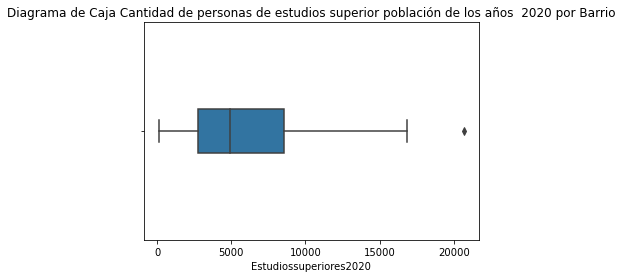

In [33]:
sns.boxplot(x=df_Edu.Estudiossuperiores2020, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de personas de estudios superior población de los años  2020 por Barrio');

## Cargue de Factor Social

El factor Social posee una fuente de información y fue preprocesada utilizando la aplicación ArcGIS ArcMap para el manejo de la información geográfica y el tratamiento de valores faltantes.

### Nivel Servicios

El componenente Nivel Servicios se encuentra subidividido en un fichero como lo es:

201747-0-bibliobuses-bibliotecas.csv

Se carga dataset descargado originalmente <i>"Bibliotecas y bibliobuses en la ciudad de Madrid"</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=ed35401429b83410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Bibliotecas y bibliobuses en la ciudad de Madrid </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk


In [34]:
# se carga la capa Bibliobuses y bibliotecas y se almacena en un dataframe
df_Biblio=pd.read_excel("Bibliobusesybibliotecas.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados


In [35]:
df_Biblio.head()

,Barrio,Bibliotecas
0,Abrantes,0
1,Acacias,1
2,Adelfas,1
3,Aeropuerto,0
4,Alameda de Osuna,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Bibliobuses y Bibliotecas

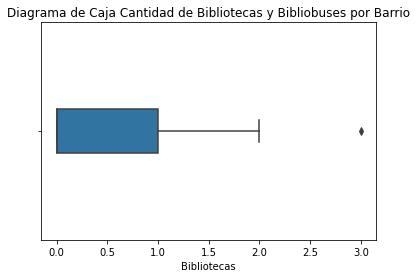

In [36]:
sns.boxplot(x=df_Biblio.Bibliotecas, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Bibliotecas y Bibliobuses por Barrio');

### Nivel Comercio

El componenente Nivel Comercio se encuentra subidividido en un fichero como lo es:

tiendas_v1_es.xml
Comercios_centenarios.xls

Se carga tiendas_v1_es.xml descargado originalmente <i>"Tiendas, comercios y mercados con perfil turístico de la ciudad de Madrid"</i> todos comprimidos eu un solo fichero y en formato xml <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=86e3a73970504510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Tiendas, comercios y mercados con perfil turístico de la ciudad de Madrid </a>

Para los datos de de Comercios centenarios Se carga Comercios_centenarios.xls descargado originalmente <i>"Comercios centenarios de Madrid"</i> todos comprimidos en un solo fichero y en formato xls <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=260aa34159f57610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Comercios centenarios de Madrid </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk

In [37]:
# se carga la capa tiendas y se almacena en un dataframe
df_tiendas=pd.read_excel("tiendas.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [38]:
df_tiendas.head()

,Barrio,Tiendas2018,Tiendas2019,Tiendas2020,Tiendas2021,Tiendas2022,TiendasTotal
0,Abrantes,0,0,0,0,0,0
1,Acacias,3,0,0,0,0,3
2,Adelfas,0,0,0,0,0,0
3,Aeropuerto,0,0,0,0,0,0
4,Alameda de Osuna,0,0,0,0,0,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de tiendas

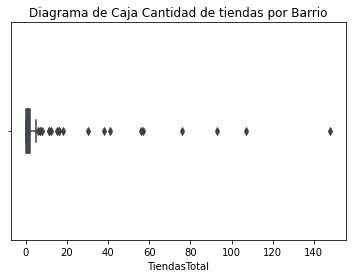

In [39]:
sns.boxplot(x=df_tiendas.TiendasTotal, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de tiendas por Barrio');

In [40]:
# se carga la capa ComerciosCentenarios y se almacena en un dataframe
df_ComCen=pd.read_excel("ComerciosCentenarios.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [41]:
df_ComCen.head()

,Barrio,Comercioscentenarios
0,Abrantes,0
1,Acacias,2
2,Adelfas,0
3,Aeropuerto,0
4,Alameda de Osuna,0


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Comercios centenarios 

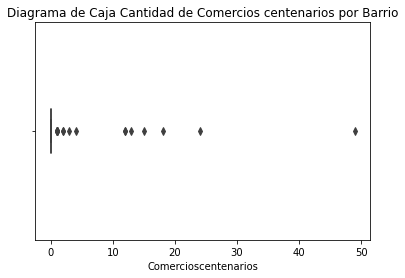

In [42]:
sns.boxplot(x=df_ComCen.Comercioscentenarios, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de Comercios centenarios por Barrio');

### Nivel Salud
El componenente Nivel Servicios se encuentra subidividido en un fichero como lo es:

212769-0-atencion-medica.csv

Se carga dataset descargado originalmente <i>"Salud"</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=da7437ac37efb410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Salud </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk

In [43]:
# se carga la capa Salud y se almacena en un dataframe
df_Salud=pd.read_excel("Salud.xls",sheet_name='Hoja1')

Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [44]:
df_Salud.head()

,Barrio,Salud
0,Abrantes,1
1,Acacias,2
2,Adelfas,2
3,Aeropuerto,0
4,Alameda de Osuna,1


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de Salud

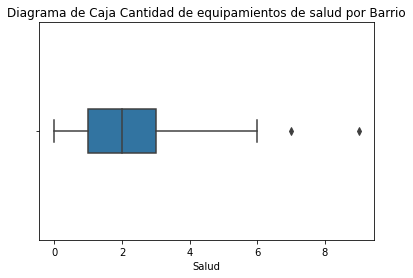

In [45]:
sns.boxplot(x=df_Salud.Salud, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de equipamientos de salud por Barrio');

## Cargue de Factor Económico

El factor Económico posee una fuente de información y fue preprocesada utilizando la aplicación ArcGIS ArcMap para el manejo de la información geográfica y el tratamiento de valores faltantes.

### Nivel Infraestructura
El componenente Nivel Infraestructura se encuentra subidividido en un fichero como lo es:

datos_uso_catastral_2020.xls

Se carga dataset descargado originalmente <i>"Catastro. Datos catastrales estadísticos a nivel de distrito y barrio."</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=3ed1854c8410b410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default" target="_blank">Catastro. Datos catastrales estadísticos a nivel de distrito y barrio. </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk

In [46]:
# se carga la capa predios catastrales  y se almacena en un dataframe
df_preCatastral=pd.read_excel("predioscatastral.xls",sheet_name='Hoja1')

Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [47]:
df_preCatastral.head()

,Barrio,AlmacenEstacionamiento2017,Comercial2017,Cultural2017,Deportivo2017,EdificioSingular2017,Espectaculos2017,Industrial2017,OcioyHosteleria2017,Oficinas2017,...,Deportivo2021,EdificioSingular2021,Espectaculos2021,Industrial2021,OcioyHosteleria2021,Oficinas2021,Religioso2021,Residencial2021,SanidadyBeneficencia2021,Suelossinedificarobrasdeurbanizacionyjardineria2021
0,Abrantes,12268.64,68464.57,1098734.95,2940455.05,NaN,NaN,434383.74,141452.78,286814.13,...,6.0,NaN,NaN,81.0,2.0,49.0,4.0,12426,1.0,13
1,Acacias,23927.70,209581.68,1017456.40,751693.27,983993.21,NaN,356966.02,4942793.84,337519.67,...,12.0,7.0,NaN,40.0,1.0,148.0,4.0,17620,4.0,19
2,Adelfas,18056.79,228759.35,2043011.06,1408887.43,NaN,NaN,63101.06,2851115.41,702271.06,...,5.0,NaN,NaN,284.0,8.0,171.0,2.0,8975,6.0,22
3,Aeropuerto,23644.44,365960.79,NaN,164607.75,1914316.60,NaN,3144013.14,6154489.85,1775622.12,...,2.0,1.0,NaN,62.0,5.0,90.0,1.0,579,2.0,32
4,Alameda de Osuna,8968.77,91179.29,9122578.44,1877129.10,1493389.34,NaN,48030.97,164092.82,2648187.39,...,24.0,2.0,NaN,20.0,277.0,69.0,7.0,8262,9.0,167


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de predios catastrales por uso

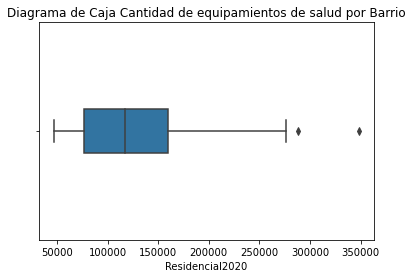

In [48]:
sns.boxplot(x=df_preCatastral.Residencial2020, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de equipamientos de salud por Barrio');

### Nivel Precios per cápita 
El componenente Precios per cápita  se encuentra subidividido en un fichero como lo es:

datos_uso_catastral_2020.xls

Se carga dataset descargado originalmente <i>"nforme de precios en venta en Madrid Comunidad."</i> todos comprimidos eu un solo fichero y en formato csv <a href="https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/report/" target="_blank">nforme de precios en venta en Madrid Comunidad. </a>

El tratamiento geográfico y de valores nulos se realizó en el fichero Indicadores_Madrid.mpk

In [49]:
# se carga la capa Venta Arriendo Precios y se almacena en un dataframe
df_preVenArr=pd.read_excel("VentaArriendoPrecios.xls",sheet_name='Hoja1')


Se realiza una consulta inicial de los datos para confirmar que estén bien estructurados

In [50]:
df_preVenArr.head()

,Barrio,Precioventam2abr2022Eum2,Variaciónmensual,Variacióntrimestral,Variaciónanual,Máximohistórico,Variaciónmáximo,Precioarriendom2abr2022Eum2,Variaciónmensual.1,Variacióntrimestral.1,...,Ventam2_2020,Ventam2_2019,Ventam2_2018,Ventam2_2017,Arriendom2_2022,Arriendom2_2021,Arriendom2_2020,Arriendom2_2019,Arriendom2_2018,Arriendom2_2017
0,Abrantes,1978.0,0.020,0.041,0.064,2.615 €/m2 mayo 2010,-0.244,10.8,0.005,-0.015,...,2002.002002,1992.041793,1858.247941,1611.663436,10.8,10.810811,11.776482,10.924381,10.453953,9.275912
1,Acacias,4153.0,-0.020,0.016,0.047,4.273 €/m2 dic 2018,-0.028,16.3,0.019,0.101,...,3762.716041,3743.996061,3492.533639,3029.083815,16.3,14.605735,16.246646,15.532166,13.600846,12.616740
2,Adelfas,4321.0,0.003,0.025,0.067,4.353 €/m2 mayo 2019,-0.007,15.4,0.031,0.070,...,4015.679831,3995.701324,3727.333325,3232.726214,15.4,14.154412,15.452415,15.254111,14.541574,13.476899
3,Aeropuerto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Alameda de Osuna,3367.0,-0.012,-0.041,-0.015,3.542 €/m2 oct 2021,-0.049,12.6,0.047,0.146,...,2927.299173,2912.735496,2717.104007,2356.551611,12.6,10.834050,11.215373,11.071444,11.183277,10.732511


Se realiza una visualización incial a través de un diagrama de caja con la variable Cantidad de precio de m2 venta predios 

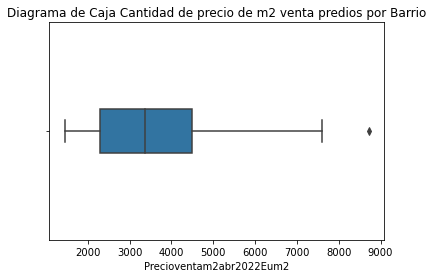

In [51]:
sns.boxplot(x=df_preVenArr.Precioventam2abr2022Eum2, width= 0.2, orient="Vertical").set(title='Diagrama de Caja Cantidad de precio de m2 venta predios por Barrio');

# Realización de Tratamiento de datos de cada factor 

Para la realizacion de la unión de los dierentes ficheros de cada factor que permita consolidar todas las fuentes con la capa de barrios como lo son:

## Factor Turismo 

### Unión de dataframe de Factor Turismo 

El factor Turismo se utiliza todos los dataframe desarrollados en el numeral 1 como lo son:

df_BCul= BienesInteresCultural

df_CyArr= CERCA_Y_ARRABAL_FELIPE_II 

df_LPCul=Limite_Pasiaje_Cultural

df_MEdPasC=Monumentos_Edificios_Singulares_Pasiaje_Cultural

df_ZAPCul= Zona_Amortiguamiento_Pasiaje_Cultural

df_Alo= alojamientos_v1_es

df_barr= Barrios

In [52]:
# se realiza una copia de Df_barr
df_barr = df_barr.rename(columns={'BARRIO':'Barrio'})
df_barrTurismo = df_barr.copy()

#BienesInteresCultural
df_barrTurismo=df_barrTurismo.merge(df_BCul,on="Barrio")
#CERCA_Y_ARRABAL_FELIPE_II 
df_barrTurismo=df_barrTurismo.merge(df_CyArr,on="Barrio")
#Limite_Pasiaje_Cultural
df_barrTurismo=df_barrTurismo.merge(df_LPCul,on="Barrio")
#Monumentos_Edificios_Singulares_Pasiaje_Cultural
df_barrTurismo=df_barrTurismo.merge(df_MEdPasC,on="Barrio")
#Zona_Amortiguamiento_Pasiaje_Cultural
df_barrTurismo=df_barrTurismo.merge(df_ZAPCul,on="Barrio")
#alojamientos_v1_es
df_barrTurismo=df_barrTurismo.merge(df_Alo,on="Barrio")
df_barrTurismo.columns


Index(['NOMDIS', 'Barrio', 'COD_DIS', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR',
       'COD_BAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB', 'AREA_M2', 'geometry',
       'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu',
       'Alojamientos'],
      dtype='object')

In [53]:
#Selección de Features
Features=['Barrio', 'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu',
       'Alojamientos']
cat_col = ['Barrio']
num_col = [ 'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu',
       'Alojamientos']
df_barrTurismo=df_barrTurismo[Features]
df_barrTurismoNumCol=df_barrTurismo[num_col]
print(df_barrTurismo)

                                             Barrio  BieIntCul  CerArrFelII  \
0                                     San Cristóbal          1            0   
1                                          Butarque          1            0   
2                                       Los Ángeles          1            0   
3                                       Los Rosales          1            0   
4    Villaverde Alto, Casco Histórico de Villaverde          1            0   
..                                              ...        ...          ...   
126                                        Valverde          0            0   
127                                       El Goloso          4            0   
128                                        El Pardo         11            0   
129                    Casco histórico de Vicálvaro          3            0   
130                                    El Cañaveral          0            0   

     LimPCul  MonEduSin  ZonAmrPaiCu  Alojamientos 

### Normalización Factor Turismo
Se realiza la normalización del factor Turismo

In [54]:

for col in df_barrTurismoNumCol.columns:
    df_barrTurismoNumCol[col] = MinMaxScaler().fit_transform(df_barrTurismoNumCol[col].values.reshape(-1, 1))
print(df_barrTurismoNumCol)

     BieIntCul  CerArrFelII  LimPCul  MonEduSin  ZonAmrPaiCu  Alojamientos
0     0.014706          0.0      0.0        0.0          0.0      0.000000
1     0.014706          0.0      0.0        0.0          0.0      0.000000
2     0.014706          0.0      0.0        0.0          0.0      0.000000
3     0.014706          0.0      0.0        0.0          0.0      0.000000
4     0.014706          0.0      0.0        0.0          0.0      0.000000
..         ...          ...      ...        ...          ...           ...
126   0.000000          0.0      0.0        0.0          0.0      0.040404
127   0.058824          0.0      0.0        0.0          0.0      0.020202
128   0.161765          0.0      0.0        0.0          0.0      0.000000
129   0.044118          0.0      0.0        0.0          0.0      0.010101
130   0.000000          0.0      0.0        0.0          0.0      0.000000

[131 rows x 6 columns]


### Reducción de la dimensionalidad del Factor Turismo 

Se Reduce la dimensionalidad a 1 componente con el fin de visualizar el resultado representativo en un mapa en una escala de color 


In [55]:
# se crea el PCA con un componente 
pca = PCA(n_components=1)

# se realiza la reducción de dimensionalidad
xpca=pca.fit_transform(df_barrTurismoNumCol)
x1pca=pca.transform(df_barrTurismoNumCol)
# se almacena el resultado en un dataframe
principalDf = pd.DataFrame(data = x1pca, columns = ['CP1Tur'])
print(principalDf)

       CP1Tur
0   -0.357736
1   -0.357736
2   -0.357736
3   -0.357736
4   -0.357736
..        ...
126 -0.355659
127 -0.344525
128 -0.322957
129 -0.349392
130 -0.361214

[131 rows x 1 columns]


### Exportación de Resultados 
Se exporta el resultado del Dataframe para visualizar en el mapa 

In [56]:
# El resultado anterior se concatena con el dataframe creado anteriormente
finalDfTur = pd.concat([df_barrTurismo, principalDf['CP1Tur']], axis = 1)
print (finalDfTur)

                                             Barrio  BieIntCul  CerArrFelII  \
0                                     San Cristóbal          1            0   
1                                          Butarque          1            0   
2                                       Los Ángeles          1            0   
3                                       Los Rosales          1            0   
4    Villaverde Alto, Casco Histórico de Villaverde          1            0   
..                                              ...        ...          ...   
126                                        Valverde          0            0   
127                                       El Goloso          4            0   
128                                        El Pardo         11            0   
129                    Casco histórico de Vicálvaro          3            0   
130                                    El Cañaveral          0            0   

     LimPCul  MonEduSin  ZonAmrPaiCu  Alojamientos 

In [57]:
# Se crea el excel writer object
writer = pd.ExcelWriter('barrTurismo.xlsx')
# se escribe el dataframe en excel
finalDfTur.to_excel(writer)
# se guarda el excel
writer.save()
print("Fichero Guardo Exitosamente")

Fichero Guardo Exitosamente



## Factor Normativo
Como este factor solo posee un componente con una variable no resulta necesario realizar ningun proceso de unión,normalización y reducción de dimensioanlidad.

## Factor Demográfico




### Unión de dataframe de Factor  Demográfico

El factor Demográfico se utiliza todos los dataframe desarrollados en el numeral 1 como lo son:


df_Nat=Natalidad
df_Pob= Población
df_Edu Educacion

In [58]:
# se realiza una copia de Df_barr
df_barrDemografico = df_barr.copy()

#Natalidad
df_barrDemografico=df_barrDemografico.merge(df_Nat,on="Barrio")
#Población 
df_barrDemografico=df_barrDemografico.merge(df_Pob,on="Barrio")
#Educacion
df_barrDemografico=df_barrDemografico.merge(df_Edu,on="Barrio")

df_barrDemografico.columns

Index(['NOMDIS', 'Barrio', 'COD_DIS', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR',
       'COD_BAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB', 'AREA_M2', 'geometry',
       'Natalidad', 'Poblacion2020', 'Poblacion2019', 'Poblacion2018',
       'Poblacion2017', 'PromIntHog_2020', 'PromIntHog_2019',
       'PromIntHog_2018', 'PromIntHog_2017', 'Estudiossuperiores2017',
       'Estudiossuperiores2018', ' BachillerElemental2019',
       'Estudiossuperiores2019', 'Noleerniescribir2019',
       ' BachillerElemental2020', 'Estudiossuperiores2020',
       'Noleerniescribir2020'],
      dtype='object')

In [59]:
#Selección de Features
Features=['Barrio','Natalidad', 'Poblacion2017', 'Poblacion2018', 'Poblacion2019',
       'Poblacion2020','PromIntHog_2020', 'PromIntHog_2019',
       'PromIntHog_2018', 'PromIntHog_2017', 'Estudiossuperiores2017',
       'Estudiossuperiores2018', ' BachillerElemental2019','Estudiossuperiores2019','Noleerniescribir2019',' BachillerElemental2020','Estudiossuperiores2020', 'Noleerniescribir2020']
cat_col = ['Barrio']
num_col = ['Natalidad', 'Poblacion2017', 'Poblacion2018', 'Poblacion2019', 'Poblacion2020','PromIntHog_2020', 'PromIntHog_2019',
       'PromIntHog_2018', ' BachillerElemental2019','Estudiossuperiores2017',
       'Estudiossuperiores2018', 'Estudiossuperiores2019','Noleerniescribir2019',' BachillerElemental2020','Estudiossuperiores2020', 'Noleerniescribir2020']
df_barrDemografico=df_barrDemografico[Features]
df_barrDemograficoCol=df_barrDemografico[num_col]
print(df_barrDemograficoCol)

     Natalidad  Poblacion2017  Poblacion2018  Poblacion2019  Poblacion2020  \
0        11.53        15187.0          15498          16052          17059   
1        11.06        17245.0          18268          18870          20766   
2         7.88        30251.0          30483          31170          32828   
3         7.69        36476.0          36975          37587          37961   
4         9.24        43449.0          44299          45204          46836   
..         ...            ...            ...            ...            ...   
125      12.85        30868.0          32058          32898          34633   
126      12.15        60011.0          61941          63201          64336   
127      14.97        17414.0          17950          18511          19020   
128       7.80         3394.0           3456           3454           3463   
129      27.49            NaN            945           1530           4421   

     PromIntHog_2020  PromIntHog_2019  PromIntHog_2018  \
0    

### Normalización Factor  Demográfico
Se realiza la normalización del factor Demográfico

In [60]:

for col in df_barrDemograficoCol.columns:
    df_barrDemograficoCol[col] = MinMaxScaler().fit_transform(df_barrDemograficoCol[col].values.reshape(-1, 1))
print(df_barrDemograficoCol)

     Natalidad  Poblacion2017  Poblacion2018  Poblacion2019  Poblacion2020  \
0     0.322868       0.177791       0.223837       0.228259       0.236938   
1     0.302927       0.203781       0.266442       0.271496       0.293209   
2     0.168010       0.368034       0.454319       0.460215       0.476305   
3     0.159949       0.446649       0.554171       0.558672       0.554221   
4     0.225711       0.534711       0.666820       0.675540       0.688940   
..         ...            ...            ...            ...            ...   
125   0.378871       0.375826       0.478544       0.486728       0.503704   
126   0.349173       0.743872       0.938169       0.951669       0.954583   
127   0.468816       0.205915       0.261551       0.265987       0.266705   
128   0.164616       0.028857       0.038621       0.034967       0.030556   
129   1.000000            NaN       0.000000       0.005447       0.045099   

     PromIntHog_2020  PromIntHog_2019  PromIntHog_2018  \
0    

### Reducción de la dimensionalidad del Factor  Demográfico
Se Reduce la dimensionalidad a 1 componente con el fin de visualizar el resultado representativo en un mapa en una escala de color 


In [61]:
# Tratamiemto valores faltantes
df_barrDemograficoCol=df_barrDemograficoCol.fillna(method = 'bfill', axis=0).fillna(0)
# se crea el PCA con un componente 
pca = PCA(n_components=1)

# se realiza la reducción de dimensionalidad
xpca=pca.fit_transform(df_barrDemograficoCol)
x1pca=pca.transform(df_barrDemograficoCol)
# se almacena el resultado en un dataframe
principalDf = pd.DataFrame(data = x1pca, columns = ['CP1Dem'])
print(principalDf)

       CP1Dem
0   -0.258978
1   -0.280486
2    0.321660
3    0.459276
4    1.035226
..        ...
125  0.283278
126  1.448848
127 -0.345851
128 -0.912759
129 -0.984738

[130 rows x 1 columns]


###  Exportación de Resultados 
Se exporta el resultado del Dataframe para visualizar en el mapa 

In [62]:
# El resultado anterior se concatena con el dataframe creado anteriormente
finalDfDem = pd.concat([df_barrDemografico, principalDf['CP1Dem']], axis = 1)
print (finalDfDem)

                                             Barrio  Natalidad  Poblacion2017  \
0                                     San Cristóbal      11.53        15187.0   
1                                          Butarque      11.06        17245.0   
2                                       Los Ángeles       7.88        30251.0   
3                                       Los Rosales       7.69        36476.0   
4    Villaverde Alto, Casco Histórico de Villaverde       9.24        43449.0   
..                                              ...        ...            ...   
125                                      Mirasierra      12.85        30868.0   
126                                        Valverde      12.15        60011.0   
127                                       El Goloso      14.97        17414.0   
128                                        El Pardo       7.80         3394.0   
129                                    El Cañaveral      27.49            NaN   

     Poblacion2018  Poblaci

In [63]:
# Se crea el excel writer object
writer = pd.ExcelWriter('barrDemografico.xlsx')
# se escribe el dataframe en excel
finalDfDem.to_excel(writer)
# se guarda el excel
writer.save()
print("Fichero Guardo Exitosamente")

Fichero Guardo Exitosamente


## Factor Social

### Unión de dataframe de Factor  Social

El factor Social se utiliza todos los dataframe desarrollados en el numeral 1 como lo son:

df_Biblio= Bibliobusesybibliotecas

df_tiendas=tiendas

df_ComCen= ComerciosCentenarios

df_Salud=Salud


In [64]:
# se realiza una copia de Df_barr
df_barrSocial = df_barr.copy()

#Bibliobusesybibliotecas
df_barrSocial=df_barrSocial.merge(df_Biblio,on="Barrio")
#tiendas 
df_barrSocial=df_barrSocial.merge(df_tiendas,on="Barrio")
#Comercios Centenarios 
df_barrSocial=df_barrSocial.merge(df_ComCen,on="Barrio")
#Salud
df_barrSocial=df_barrSocial.merge(df_Salud,on="Barrio")

df_barrSocial.shape
df_barrSocial.columns

Index(['NOMDIS', 'Barrio', 'COD_DIS', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR',
       'COD_BAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB', 'AREA_M2', 'geometry',
       'Bibliotecas', 'Tiendas2018', 'Tiendas2019', 'Tiendas2020',
       'Tiendas2021', 'Tiendas2022', 'TiendasTotal', 'Comercioscentenarios',
       'Salud'],
      dtype='object')

In [65]:
#Selección de Features
Features=['Barrio', 'Bibliotecas', 'Tiendas2018', 'Tiendas2019', 'Tiendas2020',
       'Tiendas2021', 'Tiendas2022', 'TiendasTotal', 'Comercioscentenarios',
       'Salud']
cat_col = ['Barrio']
num_col = [ 'Bibliotecas', 'Tiendas2018', 'Tiendas2019', 'Tiendas2020',
       'Tiendas2021', 'Tiendas2022', 'TiendasTotal', 'Comercioscentenarios',
       'Salud']
df_barrSocial=df_barrSocial[Features]
df_barrSocialCol=df_barrSocial[num_col]
print(df_barrSocialCol)

     Bibliotecas  Tiendas2018  Tiendas2019  Tiendas2020  Tiendas2021  \
0              0            0            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            0   
4              1            0            0            0            0   
..           ...          ...          ...          ...          ...   
125            0            0            0            0            0   
126            0            1            0            0            0   
127            0            0            0            0            0   
128            0            0            0            0            0   
129            0            0            0            0            0   

     Tiendas2022  TiendasTotal  Comercioscentenarios  Salud  
0              0             0                     0      1  
1          

### Normalización Factor  Social
Se realiza la normalización del factor Social

In [66]:
for col in df_barrSocialCol.columns:
    df_barrSocialCol[col] = MinMaxScaler().fit_transform(df_barrSocialCol[col].values.reshape(-1, 1))
print(df_barrSocialCol)

     Bibliotecas  Tiendas2018  Tiendas2019  Tiendas2020  Tiendas2021  \
0       0.000000     0.000000          0.0          0.0          0.0   
1       0.000000     0.000000          0.0          0.0          0.0   
2       0.000000     0.000000          0.0          0.0          0.0   
3       0.000000     0.000000          0.0          0.0          0.0   
4       0.333333     0.000000          0.0          0.0          0.0   
..           ...          ...          ...          ...          ...   
125     0.000000     0.000000          0.0          0.0          0.0   
126     0.000000     0.333333          0.0          0.0          0.0   
127     0.000000     0.000000          0.0          0.0          0.0   
128     0.000000     0.000000          0.0          0.0          0.0   
129     0.000000     0.000000          0.0          0.0          0.0   

     Tiendas2022  TiendasTotal  Comercioscentenarios     Salud  
0            0.0      0.000000              0.000000  0.111111  
1    

### Reducción de la dimensionalidad del Factor  Social

In [67]:
# se crea el PCA con un componente 
pca = PCA(n_components=1)

# se realiza la reducción de dimensionalidad
xpca=pca.fit_transform(df_barrSocialCol)
x1pca=pca.transform(df_barrSocialCol)
# se almacena el resultado en un dataframe
principalDf = pd.DataFrame(data = x1pca, columns = ['CP1Soc'])
print(principalDf)

       CP1Soc
0   -0.167515
1   -0.220052
2   -0.062440
3   -0.009903
4    0.130758
..        ...
125 -0.009903
126 -0.128387
127 -0.114977
128 -0.167515
129 -0.220052

[130 rows x 1 columns]


### Exportación de Resultados 
Se exporta el resultado del Dataframe para visualizar en el mapa 

In [68]:
# El resultado anterior se concatena con el dataframe creado anteriormente
finalDfSoc = pd.concat([df_barrSocial, principalDf['CP1Soc']], axis = 1)
print (finalDfSoc)

                                             Barrio  Bibliotecas  Tiendas2018  \
0                                     San Cristóbal            0            0   
1                                          Butarque            0            0   
2                                       Los Ángeles            0            0   
3                                       Los Rosales            0            0   
4    Villaverde Alto, Casco Histórico de Villaverde            1            0   
..                                              ...          ...          ...   
125                                      Mirasierra            0            0   
126                                        Valverde            0            1   
127                                       El Goloso            0            0   
128                                        El Pardo            0            0   
129                                    El Cañaveral            0            0   

     Tiendas2019  Tiendas20

In [69]:
# Se crea el excel writer object
writer = pd.ExcelWriter('barrSocial.xlsx')
# se escribe el dataframe en excel
finalDfSoc.to_excel(writer)
# se guarda el excel
writer.save()
print("Fichero Guardo Exitosamente")

Fichero Guardo Exitosamente


## Factor Económico

### Unión de dataframe de Factor  Económico

El factor Económico se utiliza todos los dataframe desarrollados en el numeral 1 como lo son:

df_preCatastral=predioscatastral
df_preVenArr= VentaArriendoPrecios




In [70]:
# se realiza una copia de Df_barr
df_barrEcon = df_barr.copy()

#predioscatastral
df_barrEcon=df_barrEcon.merge(df_preCatastral,on="Barrio")
#VentaArriendoPrecios
df_barrEcon=df_barrEcon.merge(df_preVenArr,on="Barrio")

df_barrEcon.columns

Index(['NOMDIS', 'Barrio', 'COD_DIS', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR',
       'COD_BAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB',
       ...
       'Ventam2_2020', 'Ventam2_2019', 'Ventam2_2018', 'Ventam2_2017',
       'Arriendom2_2022', 'Arriendom2_2021', 'Arriendom2_2020',
       'Arriendom2_2019', 'Arriendom2_2018', 'Arriendom2_2017'],
      dtype='object', length=101)

In [71]:
df_preCatastral.columns


Index(['Barrio', 'AlmacenEstacionamiento2017', 'Comercial2017', 'Cultural2017',
       'Deportivo2017', 'EdificioSingular2017', 'Espectaculos2017',
       'Industrial2017', 'OcioyHosteleria2017', 'Oficinas2017',
       'Religioso2017', 'Residencial2017', 'SanidadyBeneficencia2017',
       'Suelossinedificarobrasdeurbanizacionyjardineria2017',
       'AlmacenEstacionamiento2018', 'Comercial2018', 'Cultural2018',
       'Deportivo2018', 'EdificioSingular2018', 'Espectaculos2018',
       'Industrial2018', 'OcioyHosteleria2018', 'Oficinas2018',
       'Religioso2018', 'Residencial2018', 'SanidadyBeneficencia2018',
       'Suelossinedificarobrasdeurbanizacionyjardineria2018',
       'AlmacenEstacionamiento2019', 'Comercial2019', 'Cultural2019',
       'Deportivo2019', 'EdificioSingular2019', 'Espectaculos2019',
       'Industrial2019', 'OcioyHosteleria2019', 'Oficinas2019',
       'Religioso2019', 'Residencial2019', 'SanidadyBeneficencia2019',
       'Suelossinedificarobrasdeurbanizacionyja

In [72]:
#Selección de Features
Features=['Barrio','AlmacenEstacionamiento2017', 'Comercial2017', 'Cultural2017',
       'Deportivo2017', 'EdificioSingular2017', 'Espectaculos2017',
       'Industrial2017', 'OcioyHosteleria2017', 'Oficinas2017',
       'Religioso2017', 'Residencial2017', 'SanidadyBeneficencia2017',
       'Suelossinedificarobrasdeurbanizacionyjardineria2017',
       'AlmacenEstacionamiento2018', 'Comercial2018', 'Cultural2018',
       'Deportivo2018', 'EdificioSingular2018', 'Espectaculos2018',
       'Industrial2018', 'OcioyHosteleria2018', 'Oficinas2018',
       'Religioso2018', 'Residencial2018', 'SanidadyBeneficencia2018',
       'Suelossinedificarobrasdeurbanizacionyjardineria2018',
       'AlmacenEstacionamiento2019', 'Comercial2019', 'Cultural2019',
       'Deportivo2019', 'EdificioSingular2019', 'Espectaculos2019',
       'Industrial2019', 'OcioyHosteleria2019', 'Oficinas2019',
       'Religioso2019', 'Residencial2019', 'SanidadyBeneficencia2019',
       'Suelossinedificarobrasdeurbanizacionyjardineria2019',
       'AlmacenEstacionamiento2020', 'Comercial2020', 'Cultural2020',
       'Deportivo2020', 'EdificioSingular2020', 'Espectaculos2020',
       'Industrial2020', 'OcioyHosteleria2020', 'Oficinas2020',
       'Religioso2020', 'Residencial2020', 'SanidadyBeneficencia2020',
       'Suelossinedificarobrasdeurbanizacionyjardineria2020',
       'AlmacenEstacionamiento2021', 'Comercial2021', 'Cultural2021',
       'Deportivo2021', 'EdificioSingular2021', 'Espectaculos2021',
       'Industrial2021', 'OcioyHosteleria2021', 'Oficinas2021',
       'Religioso2021', 'Residencial2021', 'SanidadyBeneficencia2021',
       'Suelossinedificarobrasdeurbanizacionyjardineria2021',  'Ventam2_2022', 'Ventam2_2021', 'Ventam2_2020',
       'Ventam2_2019', 'Ventam2_2018', 'Ventam2_2017', 'Arriendom2_2022',
       'Arriendom2_2021', 'Arriendom2_2020', 'Arriendom2_2019',
       'Arriendom2_2018', 'Arriendom2_2017']
cat_col = ['Barrio']
num_col = [ 'AlmacenEstacionamiento2017', 'Comercial2017', 'Cultural2017',
       'Deportivo2017', 'EdificioSingular2017', 'Espectaculos2017',
       'Industrial2017', 'OcioyHosteleria2017', 'Oficinas2017',
       'Religioso2017', 'Residencial2017', 'SanidadyBeneficencia2017',
       'Suelossinedificarobrasdeurbanizacionyjardineria2017',
       'AlmacenEstacionamiento2018', 'Comercial2018', 'Cultural2018',
       'Deportivo2018', 'EdificioSingular2018', 'Espectaculos2018',
       'Industrial2018', 'OcioyHosteleria2018', 'Oficinas2018',
       'Religioso2018', 'Residencial2018', 'SanidadyBeneficencia2018',
       'Suelossinedificarobrasdeurbanizacionyjardineria2018',
       'AlmacenEstacionamiento2019', 'Comercial2019', 'Cultural2019',
       'Deportivo2019', 'EdificioSingular2019', 'Espectaculos2019',
       'Industrial2019', 'OcioyHosteleria2019', 'Oficinas2019',
       'Religioso2019', 'Residencial2019', 'SanidadyBeneficencia2019',
       'Suelossinedificarobrasdeurbanizacionyjardineria2019',
       'AlmacenEstacionamiento2020', 'Comercial2020', 'Cultural2020',
       'Deportivo2020', 'EdificioSingular2020', 'Espectaculos2020',
       'Industrial2020', 'OcioyHosteleria2020', 'Oficinas2020',
       'Religioso2020', 'Residencial2020', 'SanidadyBeneficencia2020',
       'Suelossinedificarobrasdeurbanizacionyjardineria2020',
       'AlmacenEstacionamiento2021', 'Comercial2021', 'Cultural2021',
       'Deportivo2021', 'EdificioSingular2021', 'Espectaculos2021',
       'Industrial2021', 'OcioyHosteleria2021', 'Oficinas2021',
       'Religioso2021', 'Residencial2021', 'SanidadyBeneficencia2021',
       'Suelossinedificarobrasdeurbanizacionyjardineria2021', 'Ventam2_2022', 'Ventam2_2021', 'Ventam2_2020',
       'Ventam2_2019', 'Ventam2_2018', 'Ventam2_2017', 'Arriendom2_2022',
       'Arriendom2_2021', 'Arriendom2_2020', 'Arriendom2_2019',
       'Arriendom2_2018', 'Arriendom2_2017']
df_barrEcon=df_barrEcon[Features]
df_barrEconCol=df_barrEcon[num_col]
print(df_barrEconCol)

     AlmacenEstacionamiento2017  Comercial2017  Cultural2017  Deportivo2017  \
0                      16047.40       19598.77    1335201.73      830049.97   
1                      12968.49      107461.40    2348914.60      579344.96   
2                      11602.67       57443.66    1005381.03      652478.59   
3                      12385.01      130748.69    1145495.42     1382309.18   
4                      10367.14       94139.90    1035488.03     2232308.35   
..                          ...            ...           ...            ...   
125                    13569.25      313999.59    9719170.51     3010163.63   
126                    13621.81      200152.43    4060399.54     3027237.85   
127                    13130.78      309906.28   64037652.78     1048167.91   
128                     9461.27      115149.95     930385.34    10099703.73   
129                         NaN            NaN           NaN            NaN   

     EdificioSingular2017  Espectaculos2017  Indust

Tratamiento de valor perdidos se reemplaza por 0 

In [73]:
df_barrEconCol=df_barrEconCol.fillna(method = 'bfill', axis=0).fillna(0)

### Normalización Factor  Económico
Se realiza la normalización del factor Económico

In [74]:
for col in df_barrEconCol.columns:
    df_barrEconCol[col] = MinMaxScaler().fit_transform(df_barrEconCol[col].values.reshape(-1, 1))
df_barrEconCol.describe()

,AlmacenEstacionamiento2017,Comercial2017,Cultural2017,Deportivo2017,EdificioSingular2017,Espectaculos2017,Industrial2017,OcioyHosteleria2017,Oficinas2017,Religioso2017,...,Ventam2_2020,Ventam2_2019,Ventam2_2018,Ventam2_2017,Arriendom2_2022,Arriendom2_2021,Arriendom2_2020,Arriendom2_2019,Arriendom2_2018,Arriendom2_2017
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.139375,0.036873,0.065333,0.094337,0.131415,0.180886,0.071541,0.032546,0.056969,0.118259,...,0.408622,0.409584,0.396196,0.383107,0.561215,0.585737,0.566030,0.561519,0.543590,0.543106
std,0.133364,0.091242,0.101124,0.171734,0.185768,0.258517,0.128802,0.100832,0.105038,0.132719,...,0.203766,0.204809,0.199831,0.191790,0.252352,0.258273,0.255960,0.258240,0.253886,0.255435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065138,0.011129,0.022550,0.019381,0.023725,0.020954,0.011179,0.001674,0.009784,0.040717,...,0.273615,0.271375,0.261543,0.254233,0.528037,0.558178,0.524090,0.517835,0.492773,0.482398
50%,0.094852,0.020320,0.040151,0.045958,0.061652,0.058787,0.026724,0.007402,0.025537,0.083862,...,0.397465,0.400377,0.379881,0.364031,0.595794,0.622116,0.585466,0.578912,0.566968,0.568429
75%,0.156359,0.033574,0.077767,0.082499,0.161496,0.202452,0.074035,0.025282,0.069892,0.144895,...,0.552218,0.552729,0.541835,0.519534,0.718458,0.741362,0.729016,0.729503,0.685829,0.687134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Reducción de la dimensionalidad del Factor  Económico

In [75]:
# se crea el PCA con un componente 
pca = PCA(n_components=1)

# se realiza la reducción de dimensionalidad
xpca=pca.fit_transform(df_barrEconCol)
x1pca=pca.transform(df_barrEconCol)
# se almacena el resultado en un dataframe
principalDf = pd.DataFrame(data = x1pca, columns = ['CP1Eco'])
print(principalDf)

       CP1Eco
0   -1.480855
1   -0.420490
2   -0.448131
3   -0.520096
4   -1.596177
..        ...
125  0.113696
126 -0.134625
127 -1.664466
128 -1.754921
129 -0.606921

[130 rows x 1 columns]


### Exportación de Resultados 
Se exporta el resultado del Dataframe para visualizar en el mapa 

In [76]:
# El resultado anterior se concatena con el dataframe creado anteriormente
finalDfEco = pd.concat([df_barrEcon, principalDf['CP1Eco']], axis = 1)
print (finalDfEco)

                                             Barrio  \
0                                     San Cristóbal   
1                                          Butarque   
2                                       Los Ángeles   
3                                       Los Rosales   
4    Villaverde Alto, Casco Histórico de Villaverde   
..                                              ...   
125                                      Mirasierra   
126                                        Valverde   
127                                       El Goloso   
128                                        El Pardo   
129                                    El Cañaveral   

     AlmacenEstacionamiento2017  Comercial2017  Cultural2017  Deportivo2017  \
0                      16047.40       19598.77    1335201.73      830049.97   
1                      12968.49      107461.40    2348914.60      579344.96   
2                      11602.67       57443.66    1005381.03      652478.59   
3                      

In [77]:
# Se crea el excel writer object
writer = pd.ExcelWriter('barrEco.xlsx')
# se escribe el dataframe en excel
finalDfEco.to_excel(writer)
# se guarda el excel
writer.save()
print("Fichero Guardo Exitosamente")

Fichero Guardo Exitosamente


##  Unión de todos los ficheros 
Se unen todos los dataframe generados parcialmente para su uso en la visualizaciones a desarrollar 
finalDfTur = Turismo

df_OrdTer = Ordenamiento Territorial

finalDfDem = Demográfico

finalDfSoc = Social

finalDfEco = Económico

In [78]:
# se realiza una copia de Df_barr
df_barrTotal = df_barr.copy()

#Turismo
df_barrTotal=df_barrTotal.merge(finalDfTur,on="Barrio")
#Ordenamiento Territorial
df_barrTotal=df_barrTotal.merge(df_OrdTer,on="Barrio")
#Demográfico
df_barrTotal=df_barrTotal.merge(finalDfDem,on="Barrio")
#Social
df_barrTotal=df_barrTotal.merge(finalDfSoc,on="Barrio")
#Economico
df_barrTotal=df_barrTotal.merge(finalDfEco,on="Barrio")

pd.set_option('display.max_columns', None)
print(df_barrTotal.columns.tolist())

['NOMDIS', 'Barrio', 'COD_DIS', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR', 'COD_BAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB', 'AREA_M2', 'geometry', 'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu', 'Alojamientos', 'CP1Tur', 'Porcm2disUsoRes', 'Natalidad', 'Poblacion2017', 'Poblacion2018', 'Poblacion2019', 'Poblacion2020', 'PromIntHog_2020', 'PromIntHog_2019', 'PromIntHog_2018', 'PromIntHog_2017', 'Estudiossuperiores2017', 'Estudiossuperiores2018', ' BachillerElemental2019', 'Estudiossuperiores2019', 'Noleerniescribir2019', ' BachillerElemental2020', 'Estudiossuperiores2020', 'Noleerniescribir2020', 'CP1Dem', 'Bibliotecas', 'Tiendas2018', 'Tiendas2019', 'Tiendas2020', 'Tiendas2021', 'Tiendas2022', 'TiendasTotal', 'Comercioscentenarios', 'Salud', 'CP1Soc', 'AlmacenEstacionamiento2017', 'Comercial2017', 'Cultural2017', 'Deportivo2017', 'EdificioSingular2017', 'Espectaculos2017', 'Industrial2017', 'OcioyHosteleria2017', 'Oficinas2017', 'Religioso2017', 'Residencial2017', 'Sani

In [79]:
#Selección de Features
Features=['Barrio',  'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu', 'Alojamientos',
          'CP1Tur', 'Porcm2disUsoRes', 'Natalidad', 'Poblacion2017', 'Poblacion2018', 'Poblacion2019', 'Poblacion2020',
          'PromIntHog_2020', 'PromIntHog_2019', 'PromIntHog_2018', 'PromIntHog_2017', 'Estudiossuperiores2017',
       'Estudiossuperiores2018', 
          ' BachillerElemental2019', 'Estudiossuperiores2019', 'Noleerniescribir2019', ' BachillerElemental2020', 
          'Estudiossuperiores2020', 'Noleerniescribir2020', 'CP1Dem', 'Bibliotecas', 'Tiendas2018', 'Tiendas2019', 
          'Tiendas2020', 'Tiendas2021', 'Tiendas2022', 'TiendasTotal', 'Comercioscentenarios', 'Salud', 'CP1Soc', 
          'AlmacenEstacionamiento2017', 'Comercial2017', 'Cultural2017', 'Deportivo2017', 'EdificioSingular2017', 
          'Espectaculos2017', 'Industrial2017', 'OcioyHosteleria2017', 'Oficinas2017', 'Religioso2017', 
          'Residencial2017', 'SanidadyBeneficencia2017', 'Suelossinedificarobrasdeurbanizacionyjardineria2017', 
          'AlmacenEstacionamiento2018', 'Comercial2018', 'Cultural2018', 'Deportivo2018', 'EdificioSingular2018', 
          'Espectaculos2018', 'Industrial2018', 'OcioyHosteleria2018', 'Oficinas2018', 'Religioso2018', 
          'Residencial2018', 'SanidadyBeneficencia2018', 'Suelossinedificarobrasdeurbanizacionyjardineria2018', 
          'AlmacenEstacionamiento2019', 'Comercial2019', 'Cultural2019', 'Deportivo2019', 'EdificioSingular2019', 
          'Espectaculos2019', 'Industrial2019', 'OcioyHosteleria2019', 'Oficinas2019', 'Religioso2019', 
          'Residencial2019', 'SanidadyBeneficencia2019', 'Suelossinedificarobrasdeurbanizacionyjardineria2019', 
          'AlmacenEstacionamiento2020', 'Comercial2020', 'Cultural2020', 'Deportivo2020', 'EdificioSingular2020', 
          'Espectaculos2020', 'Industrial2020', 'OcioyHosteleria2020', 'Oficinas2020', 'Religioso2020', 
          'Residencial2020', 'SanidadyBeneficencia2020', 'Suelossinedificarobrasdeurbanizacionyjardineria2020', 
          'AlmacenEstacionamiento2021', 'Comercial2021', 'Cultural2021', 'Deportivo2021', 'EdificioSingular2021', 
          'Espectaculos2021', 'Industrial2021', 'OcioyHosteleria2021', 'Oficinas2021', 'Religioso2021', 
          'Residencial2021', 'SanidadyBeneficencia2021', 'Suelossinedificarobrasdeurbanizacionyjardineria2021', 
          'Ventam2_2022', 'Ventam2_2021', 'Ventam2_2020', 'Ventam2_2019', 'Ventam2_2018', 'Ventam2_2017', 
          'Arriendom2_2022', 'Arriendom2_2021', 'Arriendom2_2020', 'Arriendom2_2019', 'Arriendom2_2018', 
          'Arriendom2_2017', 'CP1Eco']
cat_col = ['Barrio']
num_col = [ 'BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu',
       'Alojamientos', 'Porcm2disUsoRes', 'Natalidad',
       'Poblacion2020',' BachillerElemental2020',
       'Estudiossuperiores2020', 'Noleerniescribir2020',
       'Bibliotecas','TiendasTotal', 'Comercioscentenarios',
       'Salud', 'AlmacenEstacionamiento2021', 'Comercial2021',
       'Industrial2021',  'Oficinas2021', 'Residencial2021',     
       'Ventam2_2022',  
       'Arriendom2_2022']
df_barrTotal=df_barrTotal[Features]
df_barrTotalCol=df_barrTotal[num_col]
df_barrTotalCol.columns

Index(['BieIntCul', 'CerArrFelII', 'LimPCul', 'MonEduSin', 'ZonAmrPaiCu',
       'Alojamientos', 'Porcm2disUsoRes', 'Natalidad', 'Poblacion2020',
       ' BachillerElemental2020', 'Estudiossuperiores2020',
       'Noleerniescribir2020', 'Bibliotecas', 'TiendasTotal',
       'Comercioscentenarios', 'Salud', 'AlmacenEstacionamiento2021',
       'Comercial2021', 'Industrial2021', 'Oficinas2021', 'Residencial2021',
       'Ventam2_2022', 'Arriendom2_2022'],
      dtype='object')

Se tratan os valores falntes con cero

In [80]:
df_barrTotalCol=df_barrTotalCol.fillna(method = 'bfill', axis=0).fillna(0)
df_barrTotal=df_barrTotal.fillna(method = 'bfill', axis=0).fillna(0)

## Normalización de las variables 

In [81]:
for col in df_barrTotalCol.columns:
    df_barrTotalCol[col] = MinMaxScaler().fit_transform(df_barrTotalCol[col].values.reshape(-1, 1))
df_barrTotalCol.describe()

,BieIntCul,CerArrFelII,LimPCul,MonEduSin,ZonAmrPaiCu,Alojamientos,Porcm2disUsoRes,Natalidad,Poblacion2020,BachillerElemental2020,Estudiossuperiores2020,Noleerniescribir2020,Bibliotecas,TiendasTotal,Comercioscentenarios,Salud,AlmacenEstacionamiento2021,Comercial2021,Industrial2021,Oficinas2021,Residencial2021,Ventam2_2022,Arriendom2_2022
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.085633,0.061538,0.076923,0.009337,0.338462,0.049806,0.478823,0.185304,0.362274,0.281753,0.277269,0.218118,0.125641,0.044491,0.025432,0.227350,0.180336,0.278838,0.058855,0.110876,0.365781,0.381543,0.561215
std,0.175713,0.241245,0.267500,0.088256,0.475017,0.133539,0.229753,0.111753,0.215558,0.226072,0.196984,0.218649,0.195846,0.138755,0.111087,0.181898,0.146033,0.202285,0.124550,0.147084,0.215888,0.194022,0.252352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313915,0.132053,0.237397,0.109970,0.127600,0.058469,0.000000,0.000000,0.000000,0.111111,0.086104,0.112448,0.009468,0.020439,0.211263,0.245644,0.528037
50%,0.014706,0.000000,0.000000,0.000000,0.000000,0.010101,0.506317,0.172041,0.326634,0.226184,0.232034,0.143341,0.000000,0.006757,0.000000,0.222222,0.146388,0.265701,0.021927,0.058661,0.339112,0.367664,0.595794
75%,0.073529,0.000000,0.000000,0.000000,1.000000,0.030303,0.650252,0.214361,0.486376,0.380057,0.410585,0.319547,0.333333,0.013514,0.000000,0.333333,0.257977,0.394321,0.050664,0.131293,0.469502,0.510259,0.718458
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#   Implementación del Modelo k-means Sin reducción de Dimensionalidad

lA Implemetanción del Modelo K-means se utilizaran las <b> 22 variables</b> del último año disponible que son los que se presentan en todos los factores y componentes que contienen la recolección de la información recolectada para cada barrio como son: 


 | Factor | Componente | Atributo |Año |
| --- | --- | --- | --- |
|Turismo | Atracciones Culturales | BieIntCul | 2021 |
| | Atracciones Culturales | CerArrFelII | 2021 |
| | Atracciones Culturales | LimPCul  | 2021 |
| | Atracciones Culturales | MonEduSin   | 2021 |
| | Atracciones Culturales | ZonAmrPaiCu| 2021 |
| | Hoteles | Alojamientos | 2021 |
|Normativos | Ordenamiento Territorial | Porcm2disUsoRes | 2021 |
|Demográficos | Natalidad | Natalidad | 2021 |
| | Población | Poblacion2021<br>PromIntHog_2020 | 2021 |
| | Educación |  BachillerElemental2020 <br>Estudiossuperiores2020<br>Noleerniescribir2020  | 2020 |
|Social | Servicios | Bibliotecas| 2021 |
| | Comercio | TiendasTotal <br>Comercioscentenarios| 2021 |
| | Salud | Salud| 2020 | 
|Económico | Infraestructura | AlmacenEstacionamiento2021 <br>	Comercial2021 <br>	Industrial2021 <br>	Oficinas2021 <br> Residencial2021| 2021 | 
| | Precios per cápita  | Precioventam2abr2022Eum2 <br>	Precioarriendom2abr2022Eum2| 2022 | 




##  Regla del Codo
 
Para calcular la regla se realizar una representación gráfica de la regla del codo junto a su interpretación, utilizando la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


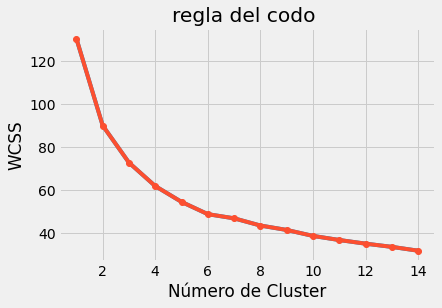

In [82]:
# se genera el metodo del codo para determinar el k-means para el dataset
X=df_barrTotalCol
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), wcss)
plt.title('regla del codo ')
plt.xlabel('Número de Cluster')
plt.ylabel('WCSS')
plt.plot(list(range(1, 15)), wcss, marker='o')
plt.show()


Para calcular el valor exacto del cluster optimo se utiliza la función ```mKneeLocator``` y la implementación en  [*kneed*](https://kneed.readthedocs.io/en/stable/parameters.html)

In [83]:
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
print("Número de cluster óptimos",kl.elbow)


Número de cluster óptimos 4


Se realiza el procedimiento de la libreria ```sklearn.metrics``` de la función  [*silhouette_score*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para encontrar los cluster que presentan mejor calidad.

In [84]:
 # se crea una lista con el coeficente de silhoette 
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

Se imprime el resultado obtenido, en el proceso anterior  

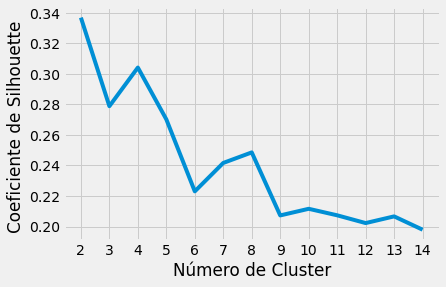

In [85]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Número de Cluster")
plt.ylabel("Coeficiente de Silhouette ")
plt.show()

## Aplicación del Modelo K-means

Se implementa el modelo S de la libreria ```sklearn.cluster``` de la función  [*KMeans*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) donde se generan <b> 4 modelos diferentes con 2, 3 , 4, y 5 modelos de cluster</b> con el fin de visualizar en los mapas los resultados.


In [86]:
# Creando el k-Means para los 2 grupos encontrados
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42,max_iter=300)
kmeans2.fit(X);
# Creando el k-Means para los 3 grupos encontrados
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42,max_iter=300)
kmeans3.fit(X);
# Creando el k-Means para los 4 grupos encontrados
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,max_iter=300)
kmeans4.fit(X);
# Creando el k-Means para los 5 grupos encontrados
kmeans5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42,max_iter=300)
kmeans5.fit(X);


In [87]:
# se adiciona cada uno de los clusters generados al dataframe final 
df_barrTotal['Kmeans_cluster2']=kmeans2.labels_
df_barrTotal['Kmeans_cluster3']=kmeans3.labels_
df_barrTotal['Kmeans_cluster4']=kmeans4.labels_
df_barrTotal['Kmeans_cluster5']=kmeans5.labels_
# se recategoriza la variable numerica a categorica para cada cluster
df_barrTotal['cluster_k2'] = df_barrTotal['Kmeans_cluster2'].replace({0: "Critico", 1: "Bajo"})
df_barrTotal['cluster_k3'] = df_barrTotal['Kmeans_cluster3'].replace({2: "Critico",0: "Medio", 1: "Bajo"})
df_barrTotal['cluster_k4'] = df_barrTotal['Kmeans_cluster4'].replace({3: "Critico",2: "Alto",0: "Medio", 1: "Bajo" })
df_barrTotal['cluster_k5'] = df_barrTotal['Kmeans_cluster5'].replace({4: "Critico",0: " Muy Alto",1: "Alto",2: "Medio",3: "Bajo"})

df_barrTotal.head()

,Barrio,BieIntCul,CerArrFelII,LimPCul,MonEduSin,ZonAmrPaiCu,Alojamientos,CP1Tur,Porcm2disUsoRes,Natalidad,Poblacion2017,Poblacion2018,Poblacion2019,Poblacion2020,PromIntHog_2020,PromIntHog_2019,PromIntHog_2018,PromIntHog_2017,Estudiossuperiores2017,Estudiossuperiores2018,BachillerElemental2019,Estudiossuperiores2019,Noleerniescribir2019,BachillerElemental2020,Estudiossuperiores2020,Noleerniescribir2020,CP1Dem,Bibliotecas,Tiendas2018,Tiendas2019,Tiendas2020,Tiendas2021,Tiendas2022,TiendasTotal,Comercioscentenarios,Salud,CP1Soc,AlmacenEstacionamiento2017,Comercial2017,Cultural2017,Deportivo2017,EdificioSingular2017,Espectaculos2017,Industrial2017,OcioyHosteleria2017,Oficinas2017,Religioso2017,Residencial2017,SanidadyBeneficencia2017,Suelossinedificarobrasdeurbanizacionyjardineria2017,AlmacenEstacionamiento2018,Comercial2018,Cultural2018,Deportivo2018,EdificioSingular2018,Espectaculos2018,Industrial2018,OcioyHosteleria2018,Oficinas2018,Religioso2018,Residencial2018,SanidadyBeneficencia2018,Suelossinedificarobrasdeurbanizacionyjardineria2018,AlmacenEstacionamiento2019,Comercial2019,Cultural2019,Deportivo2019,EdificioSingular2019,Espectaculos2019,Industrial2019,OcioyHosteleria2019,Oficinas2019,Religioso2019,Residencial2019,SanidadyBeneficencia2019,Suelossinedificarobrasdeurbanizacionyjardineria2019,AlmacenEstacionamiento2020,Comercial2020,Cultural2020,Deportivo2020,EdificioSingular2020,Espectaculos2020,Industrial2020,OcioyHosteleria2020,Oficinas2020,Religioso2020,Residencial2020,SanidadyBeneficencia2020,Suelossinedificarobrasdeurbanizacionyjardineria2020,AlmacenEstacionamiento2021,Comercial2021,Cultural2021,Deportivo2021,EdificioSingular2021,Espectaculos2021,Industrial2021,OcioyHosteleria2021,Oficinas2021,Religioso2021,Residencial2021,SanidadyBeneficencia2021,Suelossinedificarobrasdeurbanizacionyjardineria2021,Ventam2_2022,Ventam2_2021,Ventam2_2020,Ventam2_2019,Ventam2_2018,Ventam2_2017,Arriendom2_2022,Arriendom2_2021,Arriendom2_2020,Arriendom2_2019,Arriendom2_2018,Arriendom2_2017,CP1Eco,Kmeans_cluster2,Kmeans_cluster3,Kmeans_cluster4,Kmeans_cluster5,cluster_k2,cluster_k3,cluster_k4,cluster_k5
0,San Cristóbal,1,0,0,0,0,0,-0.357736,0.085457,11.53,15187.0,15498,16052,17059,3.25,3.14,3.061031,3.030732,461.0,522,5541,568,1219.000,5541,661,1252.000000,-0.258978,0,0,0,0,0,0,0,0,1,-0.167515,16047.40,19598.77,1335201.73,830049.97,51661067.49,2589414.96,23368.76,27203.65,188773.29,307124.69,28057.85,118662.65,14506.21,16047.40,19749.06,1335201.73,830049.97,51661067.49,2624971.96,23368.76,27203.65,188773.29,307124.69,28246.52,118662.65,14017.78,16047.40,19749.06,1335201.73,830049.97,51661067.49,2624971.96,23368.76,27203.65,188773.29,307124.69,28246.52,118662.65,14017.78,12823.45,123915.03,2897605.52,691510.01,14585997.04,1025693.76,2044700.86,481857.13,1296864.39,10568434.62,77566.94,2077027.84,439392.78,6,308,9.0,3.0,1.0,1.0,16.0,16.0,19.0,4.0,5667,4.0,239,1449,1449.000000,1463.636364,1443.428367,1292.236675,1195.408580,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.480855,1,1,1,1,Bajo,Bajo,Bajo,Alto
1,Butarque,1,0,0,0,0,0,-0.357736,0.049107,11.06,17245.0,18268,18870,20766,2.76,2.74,2.727090,2.713686,1511.0,1612,5115,1732,687.000,5115,1969,697.500000,-0.280486,0,0,0,0,0,0,0,0,0,-0.220052,12968.49,107461.40,2348914.60,579344.96,355554.27,2589414.96,1955538.81,108594.95,1233056.83,795889.18,74684.12,2304698.90,518198.89,13072.61,107083.31,2280928.55,585959.96,355554.27,2624971.96,2037204.60,2627628.50,1233056.83,795889.18,75684.01,2303839.49,513181.97,12827.02,106701.26,2280928.55,585959.96,355554.27,2624971.96,2037204.60,2627628.50,1233056.83,795889.18,77356.24,2077027.84,461421.08,12823.45,123915.03,2897605.52,691510.01,14585997.04,1025693.76,2044700.86,481857.13,1296864.39,10568434.62,77566.94,2077027.84,439392.78,2687,239,9.0,5.0,7.0,1.0,46.0,1.0,18.0,2.0,8256,6.0,118,2301,2233.980583,2339.246683,2266.711902,2062.522204,1770.405325,11.0,10.679612,11.373388,10.501744,9.625796,8.664083,-0.420490,1,1,1,3,Bajo,Bajo,Bajo,Bajo
2,Los Ángele

#   Implementación del Modelo k-means Con reducción de Dimensionalidad PCA

Para la reducción de la dimensionalidad se utilizó el método de análisis de componentes principales con el fin de entrenar el modelo K-means y no tener que utilizar todas las variables, sino una muestra representativa,  según la representación óptima que arroje la función “PCA” de la libreria ```sklearn.decomposition``` de la función  [*PCA*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


## Metodo  del Codo PCA

Antes de realizar el metodo del codo resulta indispensable conocer con cuantos componentes resulta necesario para una correcta representación de los atributos donde se representa el porcentaje de la variaanza con cada uno de los componentes en el siguiente resultado 

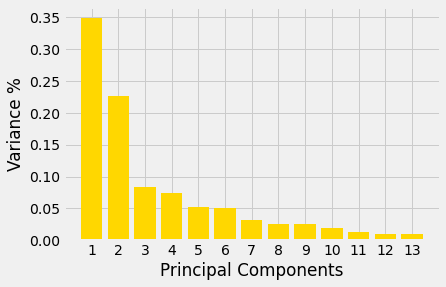

In [88]:
# se crea el PCA con 13 componente
pcaN = PCA(n_components=13);
principalComponents = pcaN.fit_transform(df_barrTotalCol);

# Se imprime una grafica con la Variancia en cada Componente
PC = range(1, pcaN.n_components_+1);
plt.bar(PC, pcaN.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);


El resultado dela grafica expresa que con solo 2 componentes se alcanca a una representación de 68% y es el valor a utilizar, se recalcula todo el proceso con 2 componentes  se entrena el metodo del codo.

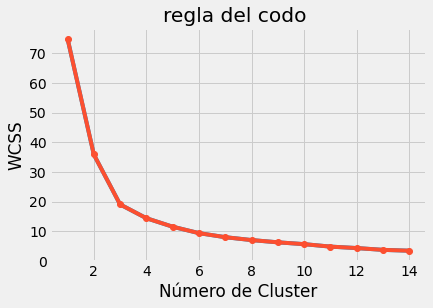

In [89]:
# se crea el PCA con 2 componente
pcaN = PCA(n_components=2);

principalComponents = pcaN.fit_transform(df_barrTotalCol);

# se genera el metodo del codo para determinar el k-means para el dataset
XPCA=principalComponents
wcssPCA = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter=300)
    kmeans.fit(XPCA)
    wcssPCA.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), wcssPCA)
plt.title('regla del codo ')
plt.xlabel('Número de Cluster')
plt.ylabel('WCSS')
plt.plot(list(range(1, 15)), wcssPCA, marker='o')
plt.show()

Para calcular el valor exacto del cluster optimo se utiliza la función ```mKneeLocator``` y la implementación en  [*kneed*](https://kneed.readthedocs.io/en/stable/parameters.html)

In [90]:
kl = KneeLocator(range(1, 15), wcssPCA, curve="convex", direction="decreasing")
print("Número de cluster óptimos",kl.elbow)



Número de cluster óptimos 3


## Aplicación del Modelo K-means Dimensionalidad Reducida para 2 componentes

Se implementa el modelo S de la libreria ```sklearn.cluster``` de la función  [*KMeans*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) donde se generan <b> 4 modelos diferentes con 2, 3 , 4, y 5 modelos de cluster</b> con el fin de visualizar en los mapas los resultados.


In [91]:

# se almacena el resultado en un dataframe
Df_PCABarPCA = pd.DataFrame(data = principalComponents, columns = ['CP1','CP2'])

In [92]:
# Creando el k-Means para los 2 grupos encontrados
kmeans2PCA = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42,max_iter=300)
kmeans2PCA.fit(principalComponents);
# Creando el k-Means para los 3 grupos encontrados
kmeans3PCA = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42,max_iter=300)
kmeans3PCA.fit(principalComponents);
# Creando el k-Means para los 4 grupos encontrados
kmeans4PCA = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,max_iter=300)
kmeans4PCA.fit(principalComponents);
# Creando el k-Means para los 5 grupos encontrados
kmeans5PCA = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42,max_iter=300)
kmeans5PCA.fit(principalComponents);


Incorporación de los datos al dataframe final 

In [93]:
# se adiciona cada uno de los clusters generados al dataframe final 
df_barrTotal['Kmeans_cluster2PCA']=kmeans2PCA.labels_
df_barrTotal['Kmeans_cluster3PCA']=kmeans3PCA.labels_
df_barrTotal['Kmeans_cluster4PCA']=kmeans4PCA.labels_
df_barrTotal['Kmeans_cluster5PCA']=kmeans5PCA.labels_
# se recategoriza la variable numerica a categorica para cada cluster
df_barrTotal['cluster_k2PCA'] = df_barrTotal['Kmeans_cluster2PCA'].replace({0: "Critico", 1: "Bajo"})
df_barrTotal['cluster_k3PCA'] = df_barrTotal['Kmeans_cluster3PCA'].replace({2: "Critico",0: "Medio", 1: "Bajo"})
df_barrTotal['cluster_k4PCA'] = df_barrTotal['Kmeans_cluster4PCA'].replace({3: "Critico",2: "Alto",0: "Medio", 1: "Bajo" })
df_barrTotal['cluster_k5PCA'] = df_barrTotal['Kmeans_cluster5PCA'].replace({4: "Critico",0: " Muy Alto",1: "Alto",2: "Medio",3: "Bajo"})

df_barrTotal.head()

,Barrio,BieIntCul,CerArrFelII,LimPCul,MonEduSin,ZonAmrPaiCu,Alojamientos,CP1Tur,Porcm2disUsoRes,Natalidad,Poblacion2017,Poblacion2018,Poblacion2019,Poblacion2020,PromIntHog_2020,PromIntHog_2019,PromIntHog_2018,PromIntHog_2017,Estudiossuperiores2017,Estudiossuperiores2018,BachillerElemental2019,Estudiossuperiores2019,Noleerniescribir2019,BachillerElemental2020,Estudiossuperiores2020,Noleerniescribir2020,CP1Dem,Bibliotecas,Tiendas2018,Tiendas2019,Tiendas2020,Tiendas2021,Tiendas2022,TiendasTotal,Comercioscentenarios,Salud,CP1Soc,AlmacenEstacionamiento2017,Comercial2017,Cultural2017,Deportivo2017,EdificioSingular2017,Espectaculos2017,Industrial2017,OcioyHosteleria2017,Oficinas2017,Religioso2017,Residencial2017,SanidadyBeneficencia2017,Suelossinedificarobrasdeurbanizacionyjardineria2017,AlmacenEstacionamiento2018,Comercial2018,Cultural2018,Deportivo2018,EdificioSingular2018,Espectaculos2018,Industrial2018,OcioyHosteleria2018,Oficinas2018,Religioso2018,Residencial2018,SanidadyBeneficencia2018,Suelossinedificarobrasdeurbanizacionyjardineria2018,AlmacenEstacionamiento2019,Comercial2019,Cultural2019,Deportivo2019,EdificioSingular2019,Espectaculos2019,Industrial2019,OcioyHosteleria2019,Oficinas2019,Religioso2019,Residencial2019,SanidadyBeneficencia2019,Suelossinedificarobrasdeurbanizacionyjardineria2019,AlmacenEstacionamiento2020,Comercial2020,Cultural2020,Deportivo2020,EdificioSingular2020,Espectaculos2020,Industrial2020,OcioyHosteleria2020,Oficinas2020,Religioso2020,Residencial2020,SanidadyBeneficencia2020,Suelossinedificarobrasdeurbanizacionyjardineria2020,AlmacenEstacionamiento2021,Comercial2021,Cultural2021,Deportivo2021,EdificioSingular2021,Espectaculos2021,Industrial2021,OcioyHosteleria2021,Oficinas2021,Religioso2021,Residencial2021,SanidadyBeneficencia2021,Suelossinedificarobrasdeurbanizacionyjardineria2021,Ventam2_2022,Ventam2_2021,Ventam2_2020,Ventam2_2019,Ventam2_2018,Ventam2_2017,Arriendom2_2022,Arriendom2_2021,Arriendom2_2020,Arriendom2_2019,Arriendom2_2018,Arriendom2_2017,CP1Eco,Kmeans_cluster2,Kmeans_cluster3,Kmeans_cluster4,Kmeans_cluster5,cluster_k2,cluster_k3,cluster_k4,cluster_k5,Kmeans_cluster2PCA,Kmeans_cluster3PCA,Kmeans_cluster4PCA,Kmeans_cluster5PCA,cluster_k2PCA,cluster_k3PCA,cluster_k4PCA,cluster_k5PCA
0,San Cristóbal,1,0,0,0,0,0,-0.357736,0.085457,11.53,15187.0,15498,16052,17059,3.25,3.14,3.061031,3.030732,461.0,522,5541,568,1219.000,5541,661,1252.000000,-0.258978,0,0,0,0,0,0,0,0,1,-0.167515,16047.40,19598.77,1335201.73,830049.97,51661067.49,2589414.96,23368.76,27203.65,188773.29,307124.69,28057.85,118662.65,14506.21,16047.40,19749.06,1335201.73,830049.97,51661067.49,2624971.96,23368.76,27203.65,188773.29,307124.69,28246.52,118662.65,14017.78,16047.40,19749.06,1335201.73,830049.97,51661067.49,2624971.96,23368.76,27203.65,188773.29,307124.69,28246.52,118662.65,14017.78,12823.45,123915.03,2897605.52,691510.01,14585997.04,1025693.76,2044700.86,481857.13,1296864.39,10568434.62,77566.94,2077027.84,439392.78,6,308,9.0,3.0,1.0,1.0,16.0,16.0,19.0,4.0,5667,4.0,239,1449,1449.000000,1463.636364,1443.428367,1292.236675,1195.408580,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.480855,1,1,1,1,Bajo,Bajo,Bajo,Alto,0,0,3,0,Critico,Medio,Critico,Muy Alto
1,Butarque,1,0,0,0,0,0,-0.357736,0.049107,11.06,17245.0,18268,18870,20766,2.76,2.74,2.727090,2.713686,1511.0,1612,5115,1732,687.000,5115,1969,697.500000,-0.280486,0,0,0,0,0,0,0,0,0,-0.220052,12968.49,107461.40,2348914.60,579344.96,355554.27,2589414.96,1955538.81,108594.95,1233056.83,795889.18,74684.12,2304698.90,518198.89,13072.61,107083.31,2280928.55,585959.96,355554.27,2624971.96,2037204.60,2627628.50,1233056.83,795889.18,75684.01,2303839.49,513181.97,12827.02,106701.26,2280928.55,585959.96,355554.27,2624971.96,2037204.60,2627628.50,1233056.83,795889.18,77356.24,2077027.84,461421.08,12823.45,123915.03,2897605.52,691510.01,14585997.04,1025693.76,2044700.86,481857.13,1296864.39,10568434.62,77566.94,2077027.84,439392.78,2687,239,9.0,5.0,7.0,1.0,46.0,1.0,18.0,2.0,8256,6.0,1

## Visualización de los datos con todas las variables

Para visualizar los resultados se utiliza el analisis de componenentes que nos permite reducir la dimensionalidad en 2 variables y poder realizar una correcta visualización.

Se crea un PCA, y se almacena el resultado en un nuevo dataframe, como esta definido que el k optimo es igual a 4 pero se quiere se realizar un analisis visual con el resto 2 3,5 se almacenan los resultados independientemente en cada variable. 

In [94]:


# se crea el PCA con un componente 
pca = PCA(n_components=2)

# se realiza la reducción de dimensionalidad
xpca=pca.fit_transform(df_barrTotalCol)
# se almacena el resultado en un dataframe
Df_PCABar = pd.DataFrame(data = xpca, columns = ['CP1','CP2'])

#Creación de dataframe con cada uno de los diferentes tipos de cluster 
Df_PCABar2=pd.concat([Df_PCABar,df_barrTotal[['Kmeans_cluster2']]],axis=1)
Df_PCABar3=pd.concat([Df_PCABar,df_barrTotal[['Kmeans_cluster3']]],axis=1)
Df_PCABar4=pd.concat([Df_PCABar,df_barrTotal[['Kmeans_cluster4']]],axis=1)
Df_PCABar5=pd.concat([Df_PCABar,df_barrTotal[['Kmeans_cluster5']]],axis=1)



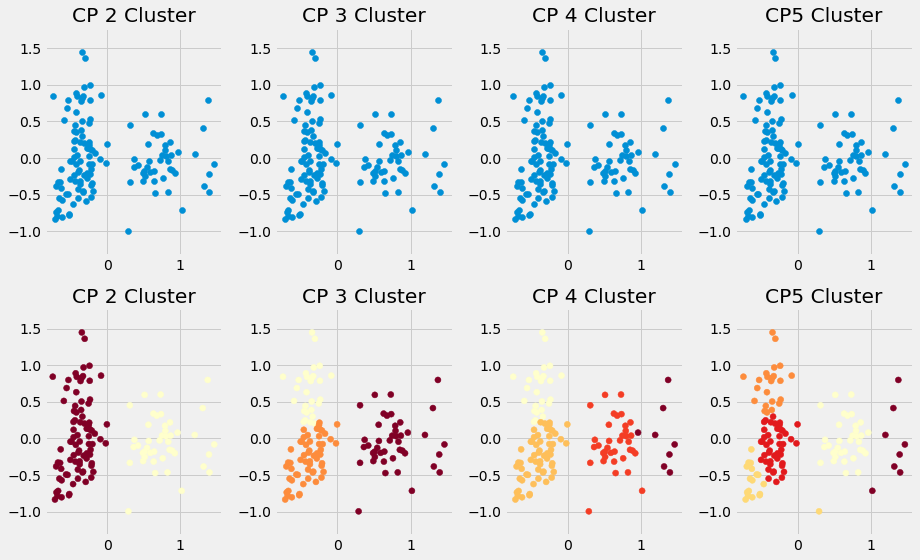

In [95]:
# Para crear la figura es necesario pasar los datos a un array 
fig, axis = plt.subplots(2, 4, figsize=(13, 8))
CP=['CP1','CP2']
XDf_PCABar=np.array(Df_PCABar2[CP])
yKmeans_cluster2=np.array(Df_PCABar2.Kmeans_cluster2)
yKmeans_cluster3=np.array(Df_PCABar3.Kmeans_cluster3)
yKmeans_cluster4=np.array(Df_PCABar4.Kmeans_cluster4)
yKmeans_cluster5=np.array(Df_PCABar5.Kmeans_cluster5)

for i, (X, y, ax, name) in enumerate(zip([XDf_PCABar, XDf_PCABar,XDf_PCABar,XDf_PCABar] * 2,
                                         [None] * 4 + [yKmeans_cluster2, yKmeans_cluster3, yKmeans_cluster4,yKmeans_cluster5],
                                         axis.reshape(-1),
                                         ['CP 2 Cluster', 'CP 3 Cluster', 'CP 4 Cluster','CP5 Cluster'] * 2)):
    ax.set_title('{}'.format(name) )
    ax.scatter(X[:,0], X[:,1], c=y, cmap='YlOrRd')
    ax.axis('equal')
plt.tight_layout()

## Visualización de los datos reducidos por PCA 
Para visualizar los resultados se utiliza el analisis de componenentes que nos permite reducir la dimensionalidad en 2 variables y poder realizar una correcta visualización.

Se crea un PCA, y se almacena el resultado en un nuevo dataframe, como esta definido que el k optimo es igual a 4 pero se quiere se realizar un analisis visual con el resto  2 3,5 se almacenan los resultados independientemente en cada variable. 


In [96]:

Df_PCABarPCA = pd.DataFrame(data =principalComponents, columns = ['CP1','CP2'])

#Creación de dataframe con cada uno de los diferentes tipos de cluster 
Df_PCABar2PCA=pd.concat([Df_PCABarPCA,df_barrTotal[['Kmeans_cluster2PCA']]],axis=1)
Df_PCABar3PCA=pd.concat([Df_PCABarPCA,df_barrTotal[['Kmeans_cluster3PCA']]],axis=1)
Df_PCABar4PCA=pd.concat([Df_PCABarPCA,df_barrTotal[['Kmeans_cluster4PCA']]],axis=1)
Df_PCABar5PCA=pd.concat([Df_PCABarPCA,df_barrTotal[['Kmeans_cluster5PCA']]],axis=1)


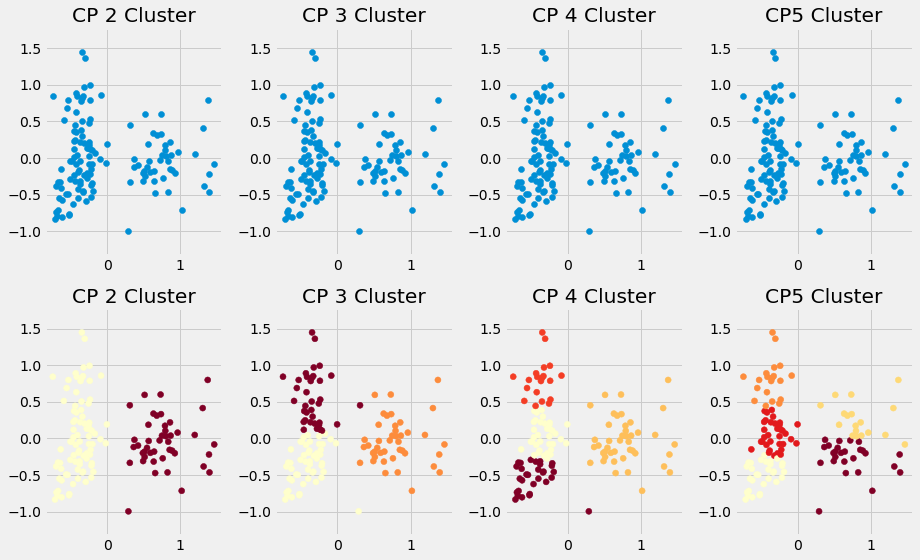

In [97]:
# Para crear la figura es necesario pasar los datos a un array 
fig, axis = plt.subplots(2, 4, figsize=(13, 8))
CP=['CP1','CP2']

XDf_PCABarPCA=np.array(Df_PCABarPCA[CP])
yKmeans_cluster2PCA=np.array(Df_PCABar2PCA.Kmeans_cluster2PCA)
yKmeans_cluster3PCA=np.array(Df_PCABar3PCA.Kmeans_cluster3PCA)
yKmeans_cluster4PCA=np.array(Df_PCABar4PCA.Kmeans_cluster4PCA)
yKmeans_cluster5PCA=np.array(Df_PCABar5PCA.Kmeans_cluster5PCA)
# se realiza un for para realizar las graficas 
for i, (X, y, ax, name) in enumerate(zip([XDf_PCABarPCA, XDf_PCABarPCA,XDf_PCABarPCA,XDf_PCABarPCA] * 2,
                                         [None] * 4 + [yKmeans_cluster2PCA, yKmeans_cluster3PCA, yKmeans_cluster4PCA,yKmeans_cluster5PCA],
                                         axis.reshape(-1),
                                         ['CP 2 Cluster', 'CP 3 Cluster', 'CP 4 Cluster','CP5 Cluster'] * 2)):
    ax.set_title('{}'.format(name) )
    ax.scatter(X[:,0], X[:,1], c=y,  cmap='YlOrRd')
    ax.axis('equal')
plt.tight_layout()


Se muestra el resultado en 8 columnas la primera fila contiene solo cluster para k igual a 2,3,4,5 y en la segunda fila categorizado por colores.

# Análisis de los barrios para 4 grupos encontrados 

Para este análisis  se realiza como primer proceso el de re categorizar las resultados del cluster para k = 4 



Una vez clasificado los datos se identifican los barrios que se encuentran en <b>K=4 en nivel Critico</b>




In [98]:

print("La cantidad de Barrios por tipo de nivel es ",df_barrTotal['cluster_k4'].value_counts() )



La cantidad de Barrios por tipo de nivel es  Bajo       60
Alto       36
Medio      26
Critico     8
Name: cluster_k4, dtype: int64


In [99]:

print("La cantidad de Barrios en Nivel critico es ",df_barrTotal.groupby('cluster_k4')['cluster_k4'].count()['Critico'])


La cantidad de Barrios en Nivel critico es  8


In [100]:
barK4Critico=df_barrTotal[df_barrTotal.cluster_k4 == 'Critico']
barK4Bajo=df_barrTotal[df_barrTotal.cluster_k4 == 'Bajo']
barK4Medio=df_barrTotal[df_barrTotal.cluster_k4 == 'Medio']
barK4Alto=df_barrTotal[df_barrTotal.cluster_k4 == 'Alto']

print("Los Barrios que se encuentran en Nivel Critico son: ",barK4Critico['Barrio'])


Los Barrios que se encuentran en Nivel Critico son:  49    Embajadores
54         Cortes
55            Sol
59        Palacio
63       Justicia
64      Recoletos
65    Universidad
69      Argüelles
Name: Barrio, dtype: object


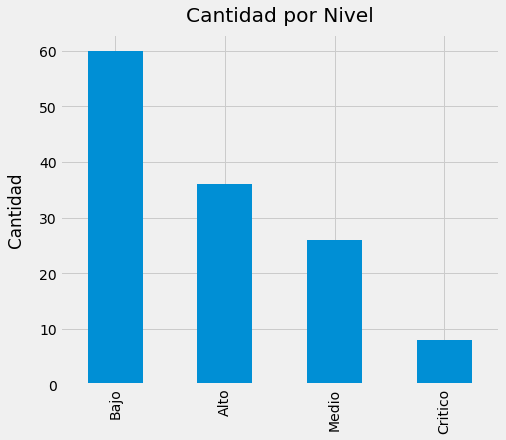

In [101]:

df_barrTotal['cluster_k4'].value_counts(). plot ( kind = 'bar' ,   figsize = ( 7 ,  6 ))    

plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Nivel" ,  y = 1.02 );

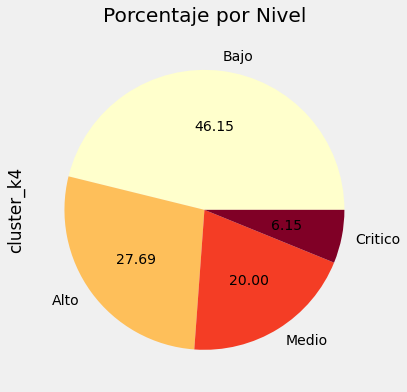

In [102]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df_barrTotal['cluster_k4'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),cmap='YlOrRd' )
plt . title ( "Porcentaje por Nivel" ,  y = 1.02 );


Se crea una función que permite realizar las graficas de tipo línea

In [103]:
# se crea una función para realizar las graficas comparativas
def grafica(X,y,Titulo,y_etiq):
    Y_Critico=np.array(barK4Critico[y].mean())
    Y_Bajo=np.array(barK4Bajo[y].mean())
    Y_Medio=np.array(barK4Medio[y].mean())
    Y_Alto=np.array(barK4Alto[y].mean())
    plt.plot(X,Y_Critico,marker="o",label='Critico',color='darkred')
    plt.plot(X,Y_Alto,marker="o",label='Alto',color='orange')
    plt.plot(X,Y_Medio,marker="o",label='Medio',color='gold')
    plt.plot(X,Y_Bajo,marker="o",label='Bajo',color='khaki')
    plt.ylabel(y_etiq)
    plt.xlabel('Año')
    plt.title(Titulo)
    plt.legend(loc='best')
    plt.gcf().set_size_inches(9, 7)
    plt.show()


Se Selecciona los barrios del K= 4 en Estado Critico

<b>Análisis de población promedio por barrio para cada nivel de cluster</b>

Se analiza la población para los años 2017 a 2020 y se calcula el porcentaje de variación de  de la población en dos años específicos del año 2017 a 2022.

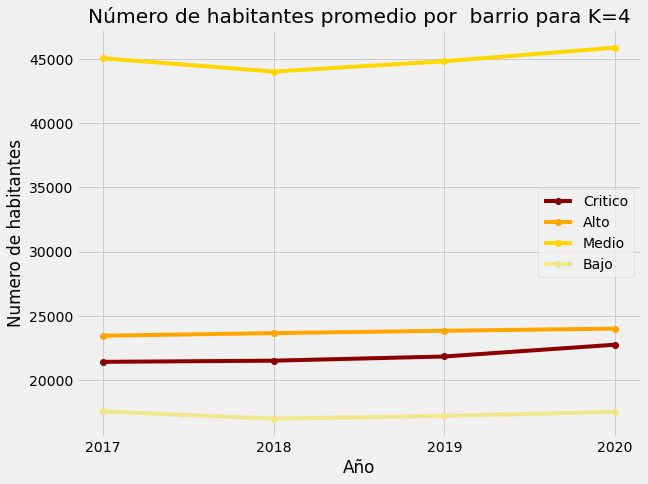

In [104]:
# se extrae los valores a graficas 
y=['Poblacion2017','Poblacion2018','Poblacion2019','Poblacion2020']
X=["2017","2018","2019","2020"]
# Se calculo el variación de la población para cada barrio entre los años 2017 a 2020
df_barrTotal["TVAPoblacion"]=(df_barrTotal["Poblacion2020"]/df_barrTotal["Poblacion2017"])-1
# se implementa la función creada anteriormente
grafica(X,y,'Número de habitantes promedio por  barrio para K=4','Numero de habitantes')



Se Calcula el promedio de la tasa de varación acumulada para cada tipo de nivel

In [105]:

print ("P",df_barrTotal.groupby(['cluster_k4'])['TVAPoblacion'].agg('mean'))



P cluster_k4
Alto       0.030155
Bajo            inf
Critico    0.061618
Medio      0.035186
Name: TVAPoblacion, dtype: float64


En los últimos 4 años la población promedio de los 8 barrios que se encuentran clasificados la poblacion crecio en promedio un 6% desde el año 2017 a 2020 para el nivel Critico .

<b>Analisis de Precio De Arriendo M2 Promedio Barrios para cada nivel</b>

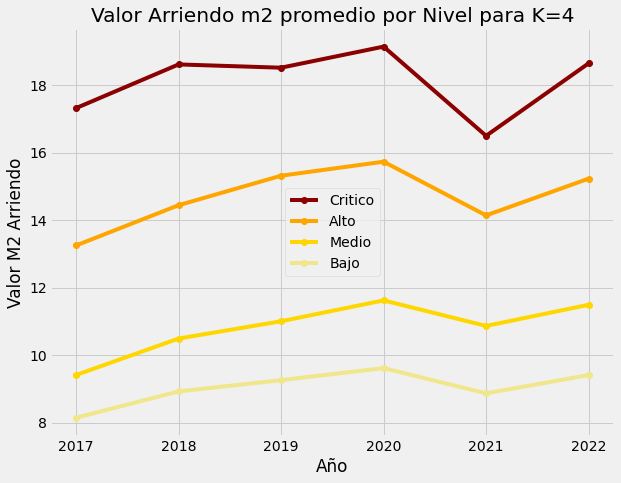

In [106]:
y=['Arriendom2_2017','Arriendom2_2018','Arriendom2_2019','Arriendom2_2020', 'Arriendom2_2021','Arriendom2_2022']
X=["2017","2018","2019","2020","2021","2022"]

# Se calculo el variación de la población para cada barrio entre los años 2017 a 2020
df_barrTotal["TVAAriendom2"]=(df_barrTotal["Arriendom2_2022"]/df_barrTotal["Arriendom2_2017"])-1

grafica(X,y,'Valor Arriendo m2 promedio por Nivel para K=4','Valor M2 Arriendo')


Se Calcula lel promedio de la tasa  de varación acumulada para cada tipo de nivel

In [107]:

print (df_barrTotal.groupby(['cluster_k4'])['TVAAriendom2'].agg('mean'))


cluster_k4
Alto       0.157572
Bajo       0.161239
Critico    0.077213
Medio      0.226459
Name: TVAAriendom2, dtype: float64


Desde el año 2017 a 2022, en los últimos 6 años el valor de la venta de metro cuadrado decrecio en promedio un 7.2% este valor se ve afectado por la Pandemia COVID-19 dado que la grafica presenta una variación para el año 2021.

<b>Analisis de Establecimientos de Comercio Barrios para cada nivel</b>

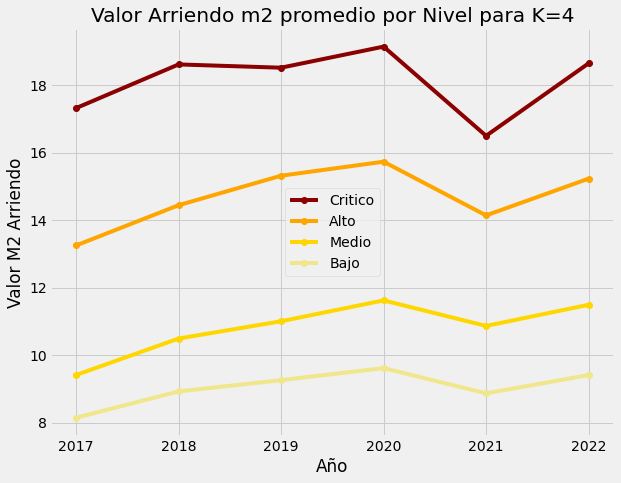

In [108]:
y=['Arriendom2_2017','Arriendom2_2018','Arriendom2_2019','Arriendom2_2020', 'Arriendom2_2021','Arriendom2_2022']
X=["2017","2018","2019","2020","2021","2022"]

# Se calculo el variación de la población para cada barrio entre los años 2017 a 2020
df_barrTotal["TVAAriendom2"]=(df_barrTotal["Arriendom2_2022"]/df_barrTotal["Arriendom2_2017"])-1

grafica(X,y,'Valor Arriendo m2 promedio por Nivel para K=4','Valor M2 Arriendo')


<b>Analisis de Promedio de número de integrantes por hogar en  Barrios</b>

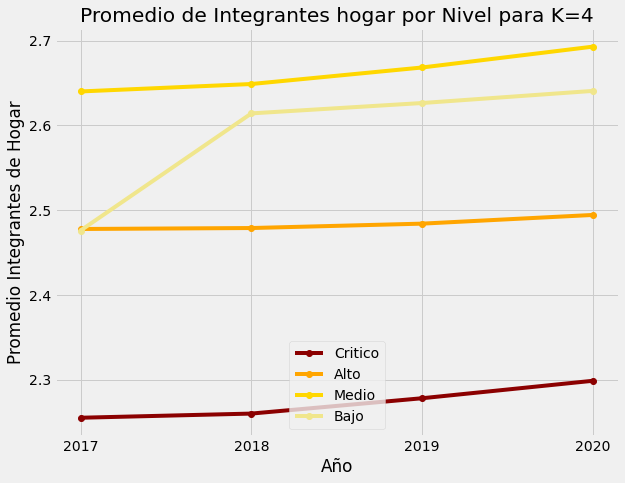

In [109]:
y=['PromIntHog_2017','PromIntHog_2018','PromIntHog_2019','PromIntHog_2020']
X=["2017","2018","2019","2020"]


# Se calculo el variación de la población para cada barrio entre los años 2017 a 2020
df_barrTotal["TVAPIntH"]=(df_barrTotal["PromIntHog_2020"]/df_barrTotal["PromIntHog_2017"])-1

grafica(X,y,'Promedio de Integrantes hogar por Nivel para K=4','Promedio Integrantes de Hogar')

Se Calcula lel promedio de la tasa  de varación acumulada para cada tipo de nivel

In [110]:

print (df_barrTotal.groupby(['cluster_k4'])['TVAPIntH'].agg('mean'))

cluster_k4
Alto       0.006987
Bajo            NaN
Critico    0.019160
Medio      0.020462
Name: TVAPIntH, dtype: float64


<b>Analisis de Población con Estudios Superioresen  Barrios para cada nivel</b>

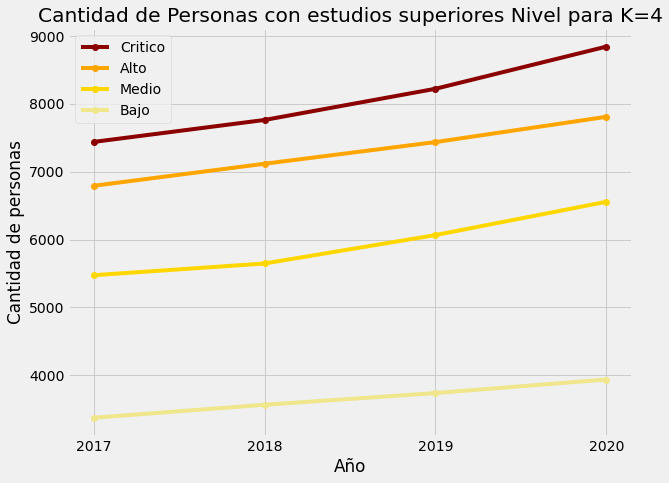

In [111]:
y=['Estudiossuperiores2017','Estudiossuperiores2018','Estudiossuperiores2019','Estudiossuperiores2020']
X=["2017","2018","2019","2020"]


# Se calculo el variación de la población para cada barrio entre los años 2017 a 2020
df_barrTotal["TVAEstSup"]=1-(df_barrTotal["Estudiossuperiores2018"]/df_barrTotal["Estudiossuperiores2020"])

grafica(X,y,'Cantidad de Personas con estudios superiores Nivel para K=4','Cantidad de personas')



Se Calcula lel promedio de la tasa  de varación acumulada para cada tipo de nivel

In [112]:
print (df_barrTotal.groupby(['cluster_k4'])['TVAEstSup'].agg('mean'))

cluster_k4
Alto       0.097202
Bajo       0.121945
Critico    0.114840
Medio      0.151284
Name: TVAEstSup, dtype: float64


# Exportación del fichero para la visualización

In [113]:
# Se crea el excel writer object
writer = pd.ExcelWriter('barrIndicadoresMadrid.xlsx')
# se escribe el dataframe en excel
df_barrTotal.to_excel(writer)
# se guarda el excel
writer.save()
print("Fichero Guardo Exitosamente")

Fichero Guardo Exitosamente


# Conclusiones Finales


Se exporta el resultado para realizar las visualizaciones en Arcgis Online

Se visualiza una muestra realizada en arcgisPro con los datos exportados de este ejercicio, para analizar como se representa cada cluster en los diferentes barrios que componen La Ciudad de Madrid, dando como resultado que el que mejor se ajusta es el de K=4, la visualización completa estara disponible en la siguiente URL [*Visualización Mapas Iteractivo*](https://barranquilla.maps.arcgis.com/apps/dashboards/9e25df37b9c94ef08f31ec16bbbef1a7)  

   

 [*Visualización Mapas Comporativo Cluster*](https://drive.google.com/file/d/1iOdHT-RiHb9ESRAyRQW4_v61KtC5ffUS/view)  

<div style='height: 100%; width: 100%; object-fit: contain'>

<img src="main_files/AnalisisClusterFinal.png">
</div>

